<a href="https://colab.research.google.com/github/raflearning/Portfolio/blob/main/IsoForest_Cont_0_1_EDA_Datathon_UI_Rafli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

1. Fitur-fitur apa saja yang dapat mempengaruhi jenis transaksi asli atau palsu?
2. Bagaimana anomali yang mungkin menandakan terjadinya fraud transaction?

# Import Datasets and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install gdown

import os
import gdown
import zipfile
import logging
from genericpath import isdir

def download_data(url, filename, dir_name: str = "data") -> None:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    os.chdir(dir_name)
    logging.info("Downloading data....")
    gdown.download(
        url, quiet=False
    )
    logging.info("Extracting zip file....")
    with zipfile.ZipFile(f"{filename}.zip", 'r') as zip_ref:
        zip_ref.extractall(filename)
    os.remove(f"{filename}.zip")
    os.chdir("..")

download_data(url="https://drive.google.com/uc?&id=1joOspf-LvEBdKLw48S2WeBno_l5J1DPj",
              filename="ristek-datathon-2024",
              dir_name="datathon-2024")


Downloading...
From (original): https://drive.google.com/uc?&id=1joOspf-LvEBdKLw48S2WeBno_l5J1DPj
From (redirected): https://drive.google.com/uc?id=1joOspf-LvEBdKLw48S2WeBno_l5J1DPj&confirm=t&uuid=2ad2c976-359c-42f6-89ad-6b0fa93fadd6
To: /content/datathon-2024/ristek-datathon-2024.zip
100%|██████████| 113M/113M [00:00<00:00, 203MB/s]


In [3]:
# Path ke direktori tempat file CSV berada
dir_path = "/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/"

# Membaca file CSV
df_train = pd.read_csv(dir_path + "train.csv")
df_test = pd.read_csv(dir_path + "test.csv")
df_la = pd.read_csv(dir_path + "loan_activities.csv")
df_nbu = pd.read_csv(dir_path + "non_borrower_user.csv")

In [4]:
df_train.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,0.976923,1.0,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,0.985634,1.0,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,0.951782,1.0,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,0.866667,0.0,0.319149,0.133333,0.031250,-1.000000,-1.000000,-1.000000,0


In [5]:
df_test.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,4,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,13,1.0,5.0,0.445,0.420,0.943820,0.8,0.783,0.234,0.778,0.993614,2.0,0.056180,0.006386,0.095238,0.750000,0.022472,0.250000
2,37,1.0,6.0,1.680,1.080,0.642857,0.6,1.167,0.046,1.007,0.862896,1.0,0.357143,0.137104,0.027778,0.500000,0.002976,0.166667
3,61,0.0,3.0,1.505,0.875,0.581395,0.9,0.425,0.012,0.286,0.672941,1.0,0.418605,0.327059,0.051429,0.333333,0.003322,0.111111
4,66,1.0,5.0,2.210,1.075,0.486425,1.0,1.349,0.087,1.015,0.752409,2.0,0.513575,0.247591,0.046512,0.800000,0.004525,0.200000


In [6]:
df_la.head()

,user_id,reference_contact,loan_type,ts
0,2223129,903716,1,671
1,1380939,484583,1,89
2,2724411,1185034,1,230
3,2401751,1369254,1,120
4,1982168,21797,1,57


In [7]:
df_nbu.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,0,1,5,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
1,1,0,8,0.63,0.565,0.896825,0.6,2.298,0.21,2.284,0.993908,1,0.103175,0.006092,0.053097,1.0,0.007937,0.166667
2,2,-1,-1,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
3,6,0,1,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
4,7,1,6,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000


# Exploratory Data Analysis

## Compare Train - Test Dataset

In [8]:
df_train1 = df_train.drop(['user_id', 'label'], axis=1)
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857899 entries, 0 to 857898
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pc0     857899 non-null  float64
 1   pc1     857899 non-null  float64
 2   pc2     857899 non-null  float64
 3   pc3     857899 non-null  float64
 4   pc4     857899 non-null  float64
 5   pc5     857899 non-null  float64
 6   pc6     857899 non-null  float64
 7   pc7     857899 non-null  float64
 8   pc8     857899 non-null  float64
 9   pc9     857899 non-null  float64
 10  pc10    857899 non-null  float64
 11  pc11    857899 non-null  float64
 12  pc12    857899 non-null  float64
 13  pc13    857899 non-null  float64
 14  pc14    857899 non-null  float64
 15  pc15    857899 non-null  float64
 16  pc16    857899 non-null  float64
dtypes: float64(17)
memory usage: 111.3 MB


In [9]:
df_test1 = df_test.drop(['user_id'], axis=1)
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367702 entries, 0 to 367701
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pc0     367702 non-null  float64
 1   pc1     367702 non-null  float64
 2   pc2     367702 non-null  float64
 3   pc3     367702 non-null  float64
 4   pc4     367702 non-null  float64
 5   pc5     367702 non-null  float64
 6   pc6     367702 non-null  float64
 7   pc7     367702 non-null  float64
 8   pc8     367702 non-null  float64
 9   pc9     367702 non-null  float64
 10  pc10    367702 non-null  float64
 11  pc11    367702 non-null  float64
 12  pc12    367702 non-null  float64
 13  pc13    367702 non-null  float64
 14  pc14    367702 non-null  float64
 15  pc15    367702 non-null  float64
 16  pc16    367702 non-null  float64
dtypes: float64(17)
memory usage: 47.7 MB


### Check similarity between train and test dataset

In [10]:
df_train1.describe()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
count,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.00000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000
mean,0.746870,3.709053,0.545364,0.391718,0.175067,0.315356,0.961431,-0.245161,0.91576,0.251290,1.336002,-0.282764,-0.358987,-0.351351,0.030651,-0.555226,-0.440967
std,0.439532,1.934880,1.941448,1.766663,0.880198,1.790893,2.766861,0.696857,2.71027,0.932444,3.565165,0.589381,0.522695,0.518399,0.875284,0.503602,0.644649
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,4.000000,0.365000,0.295000,0.738007,0.300000,0.312000,0.011000,0.28700,0.922936,0.000000,0.068966,0.011834,0.029297,0.500000,-1.000000,-1.000000
75%,1.000000,5.000000,1.150000,0.915000,0.884120,0.900000,1.501000,0.114000,1.43400,0.977522,2.000000,0.187500,0.044816,0.057143,0.800000,0.008230,0.200000
max,1.000000,8.000000,111.815000,111.475000,1.000000,456.300000,64.119000,12.338000,63.41600,1.000000,1313.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000


In [11]:
df_test1.describe()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
count,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000
mean,0.746082,3.707519,0.548174,0.393795,0.172392,0.317049,0.966813,-0.246681,0.920817,0.248578,1.346014,-0.283819,-0.360005,-0.353226,0.028216,-0.554844,-0.440620
std,0.439969,1.935365,1.948030,1.772834,0.880674,1.738704,2.791356,0.699443,2.734626,0.933026,3.514389,0.590000,0.523162,0.518760,0.875934,0.503653,0.644444
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,4.000000,0.360000,0.290000,0.736264,0.300000,0.309000,0.011000,0.284000,0.922222,0.000000,0.068582,0.011779,0.029091,0.500000,-1.000000,-1.000000
75%,1.000000,5.000000,1.150000,0.920000,0.883721,0.900000,1.505000,0.114000,1.437000,0.977305,2.000000,0.187500,0.044960,0.057143,0.800000,0.008230,0.200000
max,1.000000,8.000000,90.390000,90.160000,1.000000,120.200000,68.646000,12.679000,68.027000,1.000000,534.000000,1.000000,1.000000,1.000000,2.500000,1.000000,1.000000


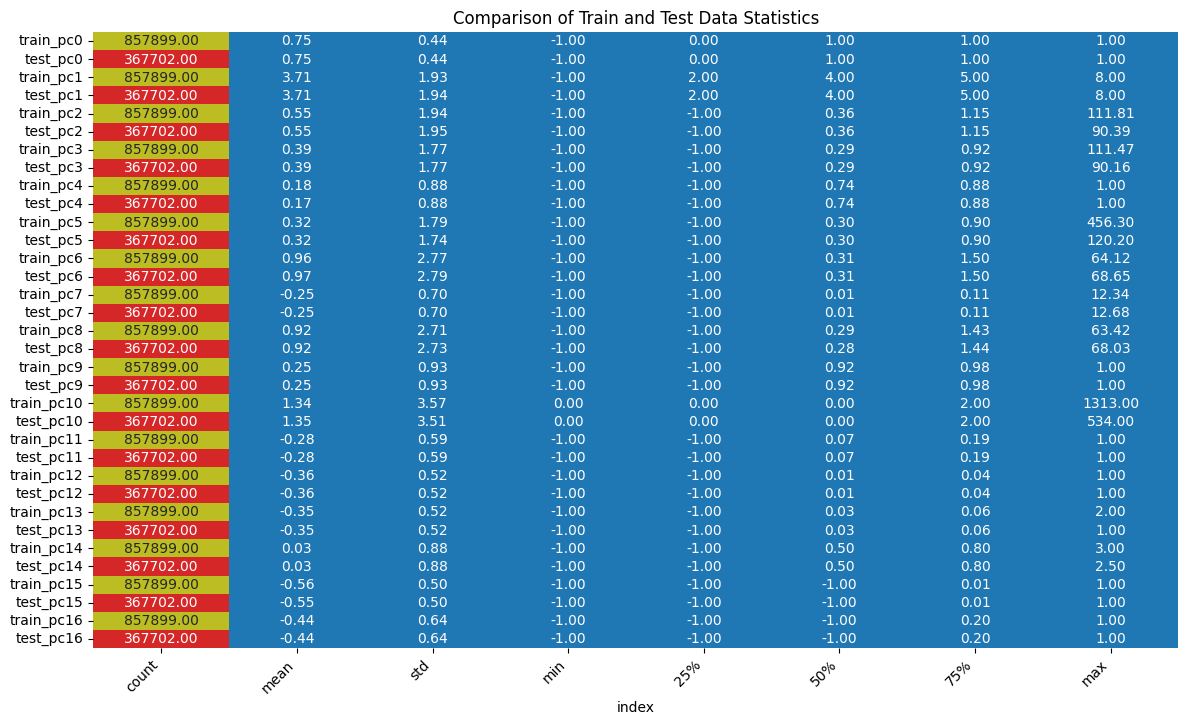

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df_train1 dan df_test1 sudah didefinisikan sebelumnya
desc_train = df_train1.describe().transpose()
desc_test = df_test1.describe().transpose()

# Menggabungkan kedua DataFrame berdasarkan index dengan kolom yang bersebelahan
comparison = pd.DataFrame()
for feature in desc_train.index:
    temp_df = pd.DataFrame({
        f'train_{feature}': desc_train.loc[feature],
        f'test_{feature}': desc_test.loc[feature]
    })
    comparison = pd.concat([comparison, temp_df], axis=1)

# Reset index untuk keperluan plotting
comparison.reset_index(inplace=True)

# Plotting heatmap dengan warna selang-seling untuk setiap kelompok pc
plt.figure(figsize=(14, 8))

# Mengatur palet warna secara manual untuk setiap kelompok pc
# Membuat palet warna yang berbeda untuk setiap kelompok pc, namun sama untuk train dan test
palette = ['#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e', '#2ca02c', '#2ca02c', '#d62728', '#d62728',
           '#9467bd', '#9467bd', '#8c564b', '#8c564b', '#e377c2', '#e377c2', '#7f7f7f', '#7f7f7f', '#bcbd22', '#bcbd22']

# Membuat heatmap dengan palet warna yang ditentukan
sns.heatmap(comparison.set_index('index').T, annot=True, fmt=".2f", cmap=sns.color_palette(palette), cbar=False)

plt.title('Comparison of Train and Test Data Statistics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


There is some unsimilarity between train - test dataset:
1. pc2 : Max
2. pc3 : Max
3. pc5 : Standard Deviation, Max
4. pc6 : Standard Deviation, Max
5. pc7 : Max
6. pc8 : Standard Deviation, Max
7. pc10 : Standard Deviation, Max
8. pc13 : Max
9. pc14 : Max

### Variance Hypothesis Testing *(Skip)*



Lets test the variance between two datasets (train and test). The purpose is if reject null hypothesis, we have to do some additional techniques.

In [13]:
# PC 5
from scipy import stats
import numpy as np

# Contoh data dua sampel
sample1_pc5 = df_train1['pc5']
sample2_pc5 = df_test1['pc5']

# Melakukan uji F untuk menguji perbedaan varians
F_statistic, p_value = stats.f_oneway(sample1_pc5, sample2_pc5)

# Menampilkan hasil
print(f"Nilai F-statistik: {F_statistic}")
print(f"Nilai p-value: {p_value}")

# Mengambil keputusan
alpha = 0.05
if p_value < alpha:
    print("Varians dari kedua sampel berbeda secara signifikan.")
else:
    print("Tidak cukup bukti untuk menyimpulkan bahwa varians dari kedua sampel berbeda secara signifikan.")


Nilai F-statistik: 0.23399830716785414
Nilai p-value: 0.6285749488245683
Tidak cukup bukti untuk menyimpulkan bahwa varians dari kedua sampel berbeda secara signifikan.


In [14]:
# PC 6
from scipy import stats
import numpy as np

# Contoh data dua sampel
sample1_pc6 = df_train1['pc6']
sample2_pc6 = df_test1['pc6']

# Melakukan uji F untuk menguji perbedaan varians
F_statistic, p_value = stats.f_oneway(sample1_pc6, sample2_pc6)

# Menampilkan hasil
print(f"Nilai F-statistik: {F_statistic}")
print(f"Nilai p-value: {p_value}")

# Mengambil keputusan
alpha = 0.05
if p_value < alpha:
    print("Varians dari kedua sampel berbeda secara signifikan.")
else:
    print("Tidak cukup bukti untuk menyimpulkan bahwa varians dari kedua sampel berbeda secara signifikan.")


Nilai F-statistik: 0.968689639917058
Nilai p-value: 0.32500739072799945
Tidak cukup bukti untuk menyimpulkan bahwa varians dari kedua sampel berbeda secara signifikan.


In [15]:
# PC 8
from scipy import stats
import numpy as np

# Contoh data dua sampel
sample1_pc8 = df_train1['pc8']
sample2_pc8 = df_test1['pc8']

# Melakukan uji F untuk menguji perbedaan varians
F_statistic, p_value = stats.f_oneway(sample1_pc8, sample2_pc8)

# Menampilkan hasil
print(f"Nilai F-statistik: {F_statistic}")
print(f"Nilai p-value: {p_value}")

# Mengambil keputusan
alpha = 0.05
if p_value < alpha:
    print("Varians dari kedua sampel berbeda secara signifikan.")
else:
    print("Tidak cukup bukti untuk menyimpulkan bahwa varians dari kedua sampel berbeda secara signifikan.")


Nilai F-statistik: 0.8912686114112031
Nilai p-value: 0.345133943761746
Tidak cukup bukti untuk menyimpulkan bahwa varians dari kedua sampel berbeda secara signifikan.


In [16]:
# PC 10
from scipy import stats
import numpy as np

# Contoh data dua sampel
sample1_pc10 = df_train1['pc10']
sample2_pc10 = df_test1['pc10']

# Melakukan uji F untuk menguji perbedaan varians
F_statistic, p_value = stats.f_oneway(sample1_pc10, sample2_pc10)

# Menampilkan hasil
print(f"Nilai F-statistik: {F_statistic}")
print(f"Nilai p-value: {p_value}")

# Mengambil keputusan
alpha = 0.05
if p_value < alpha:
    print("Varians dari kedua sampel berbeda secara signifikan.")
else:
    print("Tidak cukup bukti untuk menyimpulkan bahwa varians dari kedua sampel berbeda secara signifikan.")


Nilai F-statistik: 2.047078708992937
Nilai p-value: 0.15249881164340898
Tidak cukup bukti untuk menyimpulkan bahwa varians dari kedua sampel berbeda secara signifikan.


All hypothesis that we already made at the first, the result is REJECT NULL hypothesis. It turns out that the variance between data train and test is similar.

The next case is about maximum data between two datasets. We have to exclude outlier data that we guess probably the difference of maximum data is affect by the outliers.

Let's visualize them using boxplot

### Boxplot to detect outliers

In [17]:
data = list(range(17))
print(data)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


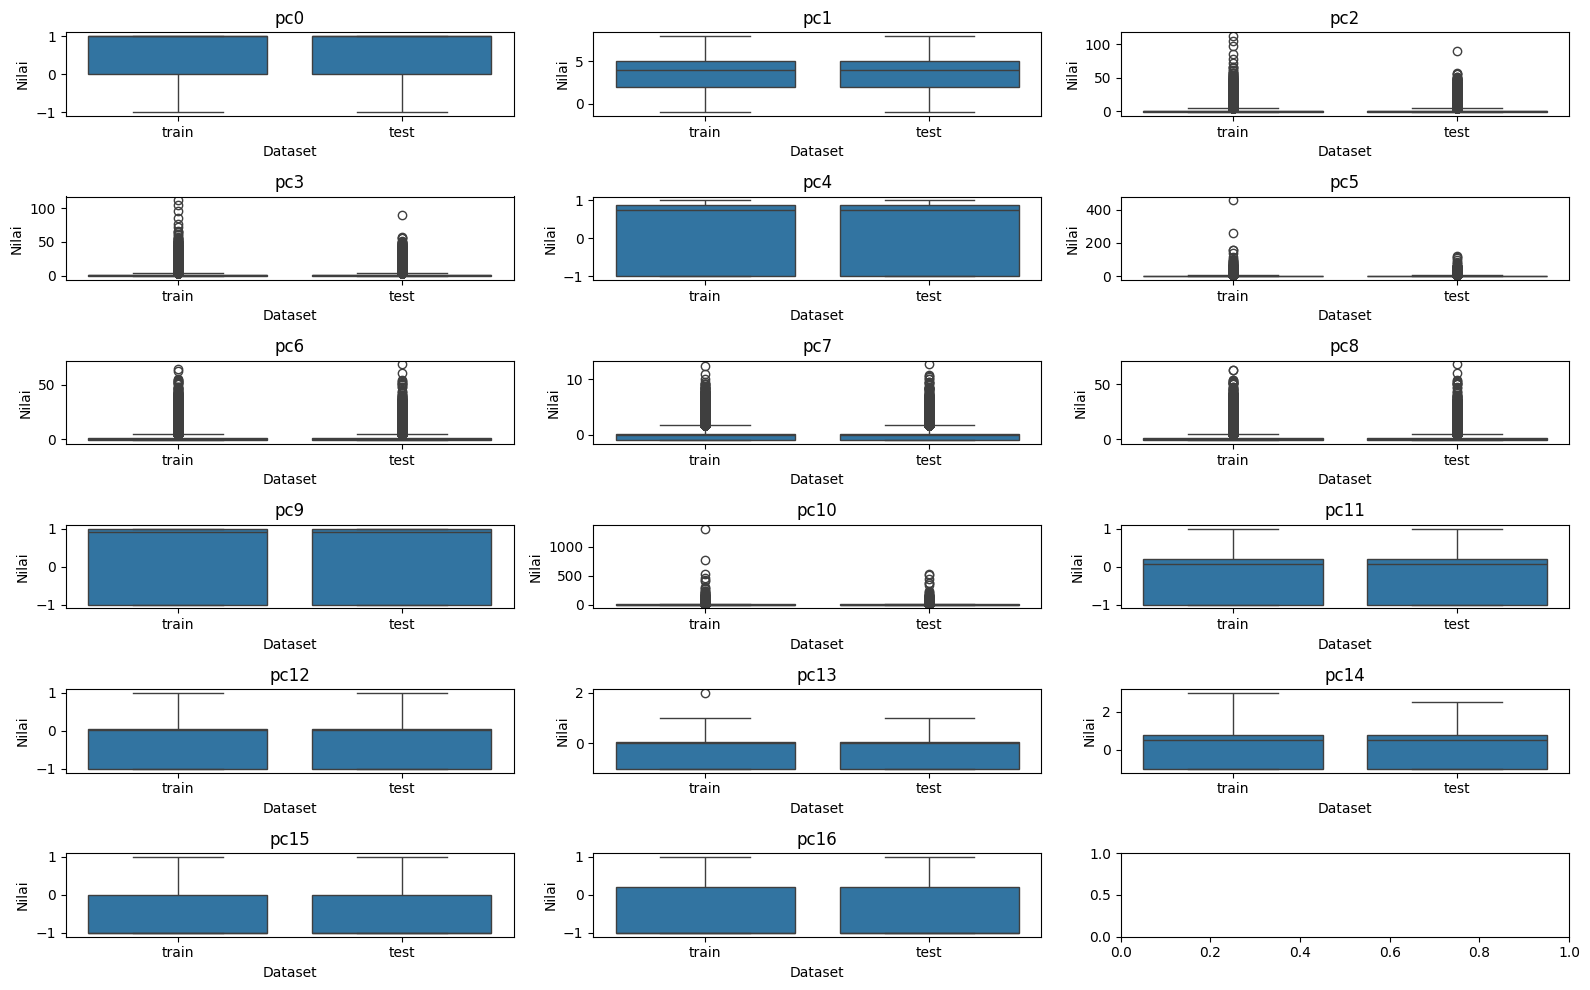

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menggabungkan df_train1 dan df_test1 dengan kolom tambahan 'Dataset'
df_train1['Dataset'] = 'train'
df_test1['Dataset'] = 'test'
df_combined = pd.concat([df_train1, df_test1])

# Daftar PC yang akan diplot, sesuaikan dengan data Anda
data = list(range(17))
pcs = [f'pc{i}' for i in data]

# Membuat figure dengan subplot grid yang sesuai
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 10))  # Sesuaikan ukuran grid jika perlu
axes = axes.flatten()

# Plotting boxplot untuk setiap PC
for i, pc in enumerate(pcs):
    sns.boxplot(x='Dataset', y=pc, data=df_combined, ax=axes[i])
    axes[i].set_title(f'{pc}')
    axes[i].set_xlabel('Dataset')
    axes[i].set_ylabel('Nilai')

plt.tight_layout()
plt.show()


From the boxplots above, we can see the imbalance max data between train and test dataset, especially pc2, pc3, pc5, pc6, pc10, and pc13.

For this case, we have to exclude 1 or 2 data outlier to balance the 2 datasets.

### Outlier Handling

Next, we have to handlle outlier with isolation forest

In [20]:
from sklearn.ensemble import IsolationForest
import pandas as pd

data = list(range(17))

# Membuat model Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# DataFrame kosong untuk menyimpan hasil
df_train1_outliers = pd.DataFrame()
df_test1_outliers = pd.DataFrame()

# Melakukan loop untuk setiap fitur
for i in data:
    # Melatih dan memprediksi menggunakan Isolation Forest pada df_train1
    iso_forest.fit(df_train1[[f'pc{i}']])
    outliers_train = iso_forest.predict(df_train1[[f'pc{i}']])
    df_train1_outliers[f'pc{i}_outlier'] = outliers_train

    # Melatih dan memprediksi menggunakan Isolation Forest pada df_test1
    outliers_test = iso_forest.predict(df_test1[[f'pc{i}']])
    df_test1_outliers[f'pc{i}_outlier'] = outliers_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,

   pc0_outlier  pc1_outlier  pc2_outlier  pc3_outlier  pc4_outlier  \
0            1            1            1            1            1   
1            1            1            1            1            1   
2            1            1            1            1            1   
3            1            1            1            1            1   
4            1            1            1            1            1   

   pc5_outlier  pc6_outlier  pc7_outlier  pc8_outlier  pc9_outlier  \
0            1            1            1            1            1   
1            1            1            1            1            1   
2            1            1            1            1            1   
3            1            1            1            1            1   
4            1            1            1            1            1   

   pc10_outlier  pc11_outlier  pc12_outlier  pc13_outlier  pc14_outlier  \
0             1             1             1             1             1   
1       

In [21]:
for i in data:
    print(f'Jumlah nilai untuk pc{i} di data train:')
    print(df_train1_outliers[f'pc{i}_outlier'].value_counts())
    print()

# Menghitung jumlah nilai yang muncul untuk setiap fitur pada data test
for i in data:
    print(f'Jumlah nilai untuk pc{i} di data test:')
    print(df_test1_outliers[f'pc{i}_outlier'].value_counts())
    print()

Jumlah nilai untuk pc0 di data train:
pc0_outlier
 1    856126
-1      1773
Name: count, dtype: int64

Jumlah nilai untuk pc1 di data train:
pc1_outlier
 1    820593
-1     37306
Name: count, dtype: int64

Jumlah nilai untuk pc2 di data train:
pc2_outlier
 1    815073
-1     42826
Name: count, dtype: int64

Jumlah nilai untuk pc3 di data train:
pc3_outlier
 1    815004
-1     42895
Name: count, dtype: int64

Jumlah nilai untuk pc4 di data train:
pc4_outlier
 1    815012
-1     42887
Name: count, dtype: int64

Jumlah nilai untuk pc5 di data train:
pc5_outlier
 1    816510
-1     41389
Name: count, dtype: int64

Jumlah nilai untuk pc6 di data train:
pc6_outlier
 1    815054
-1     42845
Name: count, dtype: int64

Jumlah nilai untuk pc7 di data train:
pc7_outlier
 1    815031
-1     42868
Name: count, dtype: int64

Jumlah nilai untuk pc8 di data train:
pc8_outlier
 1    815016
-1     42883
Name: count, dtype: int64

Jumlah nilai untuk pc9 di data train:
pc9_outlier
 1    815138
-1     427

In [22]:
import pandas as pd
import numpy as np

# Mengganti nilai outlier dengan median nilai data mentah (df_train1)
df_train1_outliers_imputed = df_train1.copy()

for i in data:
    median_value_train = np.median(df_train1[f'pc{i}'])
    df_train1_outliers_imputed.loc[df_train1_outliers[f'pc{i}_outlier'] == -1, f'pc{i}'] = median_value_train

# Mengganti nilai outlier dengan median nilai data mentah (df_test1)
df_test1_outliers_imputed = df_test1.copy()

for i in data:
    median_value_test = np.median(df_test1[f'pc{i}'])
    df_test1_outliers_imputed.loc[df_test1_outliers[f'pc{i}_outlier'] == -1, f'pc{i}'] = median_value_test

# Menampilkan hasil jika diperlukan
print(df_train1_outliers_imputed.head())
print(df_test1_outliers_imputed.head())

   pc0  pc1    pc2    pc3       pc4  pc5    pc6    pc7    pc8       pc9  pc10  \
0  1.0  1.0  0.275  0.255  0.927273  0.4  0.260  0.040  0.254  0.976923   1.0   
1  0.0  0.0  0.430  0.365  0.848837  0.4  1.253  0.210  1.235  0.985634   1.0   
2  1.0  3.0  1.315  0.825  0.627376  0.9  2.385  0.128  2.270  0.951782   1.0   
3  0.0  5.0 -1.000 -1.000 -1.000000 -1.0 -1.000 -1.000 -1.000 -1.000000   0.0   
4  1.0  1.0  0.235  0.160  0.680851  0.1  0.120  0.002  0.104  0.866667   0.0   

       pc11      pc12      pc13      pc14      pc15      pc16 Dataset  
0  0.072727  0.023077  0.078431  0.750000  0.018182  0.250000   train  
1  0.151163  0.014366  0.054795  0.500000  0.011628  0.250000   train  
2  0.372624  0.048218  0.054545  0.777778  0.003802  0.111111   train  
3 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   train  
4  0.319149  0.133333  0.031250 -1.000000 -1.000000 -1.000000   train  
   pc0  pc1    pc2    pc3       pc4  pc5    pc6    pc7    pc8       pc9  pc10  \


In [27]:
df_train1_outliers_imputed.describe()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
count,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000
mean,0.751003,3.553723,0.256546,0.137173,0.181361,0.091450,0.476997,-0.315196,0.440845,0.260399,0.917797,-0.298345,-0.370937,-0.357304,0.034777,-0.607535,-0.514447
std,0.432432,1.707300,1.130395,0.991016,0.882382,0.995275,1.545730,0.559506,1.505224,0.937716,1.436174,0.573194,0.510122,0.512553,0.875283,0.492467,0.610817
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,4.000000,0.365000,0.295000,0.738007,0.300000,0.312000,0.011000,0.287000,0.922936,0.000000,0.068966,0.011834,0.029297,0.500000,-1.000000,-1.000000
75%,1.000000,5.000000,0.935000,0.750000,0.878788,0.700000,1.153000,0.077000,1.092000,0.977522,1.000000,0.166667,0.036232,0.052632,0.800000,0.006772,0.181818
max,1.000000,7.000000,3.575000,2.890000,1.000000,2.700000,6.024000,0.724000,5.872000,1.000000,6.000000,0.422222,0.173346,0.123288,1.166667,0.029167,0.517241


In [29]:
df_test1_outliers_imputed.describe()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
count,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000
mean,0.750211,3.552053,0.255056,0.135819,0.178904,0.089862,0.475733,-0.316955,0.439174,0.257808,0.920514,-0.299734,-0.372134,-0.359158,0.032293,-0.607482,-0.513504
std,0.432892,1.707564,1.132072,0.992872,0.882988,0.996923,1.549592,0.560066,1.508523,0.938378,1.439323,0.573460,0.510394,0.512929,0.875951,0.492470,0.611178
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,4.000000,0.360000,0.290000,0.736264,0.300000,0.309000,0.011000,0.284000,0.922222,0.000000,0.068582,0.011779,0.029091,0.500000,-1.000000,-1.000000
75%,1.000000,5.000000,0.940000,0.745000,0.878788,0.700000,1.149000,0.077000,1.089000,0.977305,1.000000,0.166667,0.036190,0.052434,0.800000,0.006775,0.181818
max,1.000000,7.000000,3.575000,2.890000,1.000000,2.700000,6.024000,0.724000,5.872000,1.000000,6.000000,0.422222,0.173352,0.123288,1.166667,0.029167,0.517241


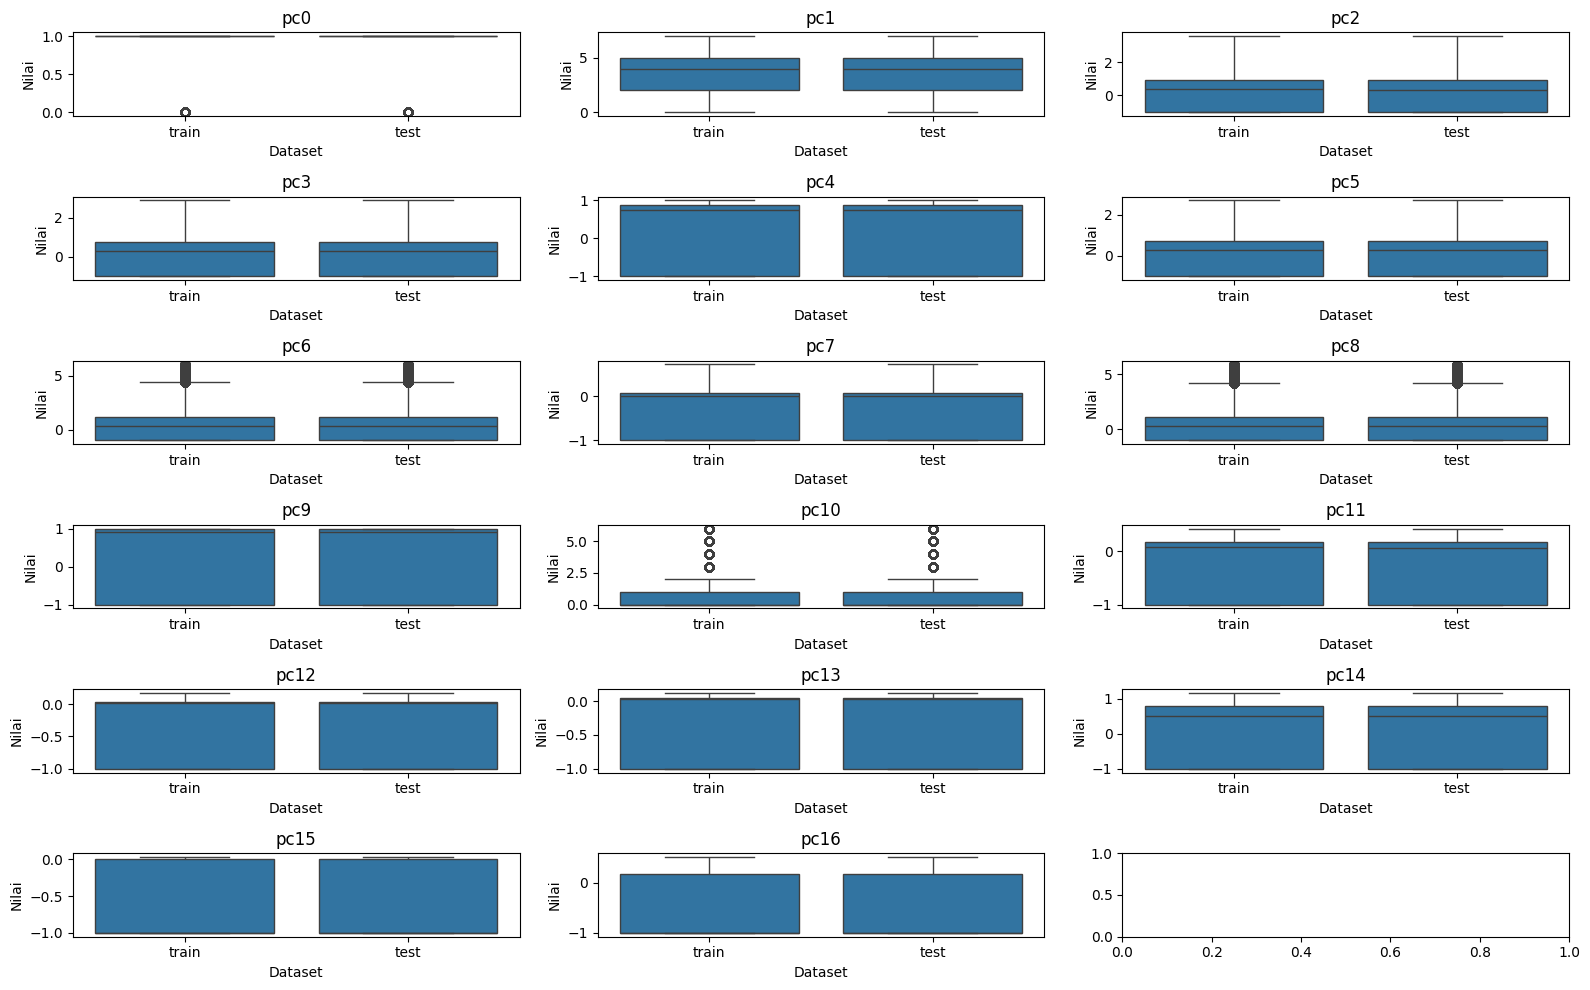

In [59]:
df_combined_boxplot_imputed = pd.concat([df_train1_outliers_imputed, df_test1_outliers_imputed])

# Daftar PC yang akan diplot, sesuaikan dengan data Anda
data = list(range(17))
pcs = [f'pc{i}' for i in data]

# Membuat figure dengan subplot grid yang sesuai
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 10))  # Sesuaikan ukuran grid jika perlu
axes = axes.flatten()

# Plotting boxplot untuk setiap PC
for i, pc in enumerate(pcs):
    sns.boxplot(x='Dataset', y=pc, data=df_combined_boxplot_imputed, ax=axes[i])
    axes[i].set_title(f'{pc}')
    axes[i].set_xlabel('Dataset')
    axes[i].set_ylabel('Nilai')

plt.tight_layout()
plt.show()

### Box-cox Transform

Box-cox transformation is used to normalize data distribution.

In order to boxcox transformation can't process negative value, we have to add a constant number to swipe right the distribution

In [33]:
import numpy as np
from scipy.stats import boxcox

data = list(range(17))

# Transformasi Box-Cox dengan penambahan nilai minimum
for i in data:
    min_value = df_train1_outliers_imputed[f'pc{i}'].min()
    transformed_data = df_train1_outliers_imputed[f'pc{i}'] + np.abs(min_value) + 1  # Tambahkan nilai minimum dan beberapa untuk menghindari nilai nol

    # Transformasi Box-Cox untuk df_train1_outliers_imputed
    df_train_boxcox, lambda_value_train = boxcox(transformed_data)
    df_train1_outliers_imputed[f'pc{i}_boxcox'] = df_train_boxcox
    print(f"Nilai lambda untuk train_pc{i}: {lambda_value_train}")

    # Transformasi Box-Cox untuk df_test1_outliers_imputed (jika perlu)
    transformed_data_test = df_test1_outliers_imputed[f'pc{i}'] + np.abs(min_value) + 1  # Tambahkan nilai minimum untuk data uji
    df_test_boxcox, lambda_value_test = boxcox(transformed_data_test)
    df_test1_outliers_imputed[f'pc{i}_boxcox'] = df_test_boxcox
    print(f"Nilai lambda untuk train_pc{i}: {lambda_value_test}")

Nilai lambda untuk train_pc0: 5.214353025003725
Nilai lambda untuk train_pc0: 5.190633182466963
Nilai lambda untuk train_pc1: 0.9214324759399429
Nilai lambda untuk train_pc1: 0.921924490453961
Nilai lambda untuk train_pc2: 0.2189552226449634
Nilai lambda untuk train_pc2: 0.2124031268953971
Nilai lambda untuk train_pc3: 0.32470106142465793
Nilai lambda untuk train_pc3: 0.3158692488105103
Nilai lambda untuk train_pc4: 1.6500633006544205
Nilai lambda untuk train_pc4: 1.6339951827721868
Nilai lambda untuk train_pc5: 0.22650666799736682
Nilai lambda untuk train_pc5: 0.2176610237249519
Nilai lambda untuk train_pc6: -0.12756806412562186
Nilai lambda untuk train_pc6: -0.13386716376165173
Nilai lambda untuk train_pc7: 1.1936966369966833
Nilai lambda untuk train_pc7: 1.1730735789531073
Nilai lambda untuk train_pc8: -0.13149094361506286
Nilai lambda untuk train_pc8: -0.137879105154533
Nilai lambda untuk train_pc9: 1.6683614071684025
Nilai lambda untuk train_pc9: 1.6521461361336514
Nilai lambda un

In [44]:
# Menampilkan hasil transformasi Box-Cox
transformed_columns_train = [col for col in df_train1_outliers_imputed.columns if '_boxcox' in col]
df_train_boxcox = df_train1_outliers_imputed[transformed_columns_train]
df_train_boxcox.head()

,pc0_boxcox,pc1_boxcox,pc2_boxcox,pc3_boxcox,pc4_boxcox,pc5_boxcox,pc6_boxcox,pc7_boxcox,pc8_boxcox,pc9_boxcox,pc10_boxcox,pc11_boxcox,pc12_boxcox,pc13_boxcox,pc14_boxcox,pc15_boxcox,pc16_boxcox
0,6.92816,0.970223,0.900593,0.930604,2.960060,0.968305,0.774393,1.124318,0.770788,3.099960,0.446565,1.282623,1.386069,1.585477,1.650922,0.379572,0.440867
1,0.00000,0.000000,0.980074,0.993106,2.803769,0.968305,1.095117,1.321034,1.087898,3.118038,0.446565,1.390640,1.371378,1.540115,1.423807,0.378758,0.440867
2,6.92816,2.807820,1.370406,1.235062,2.377543,1.204070,1.347181,1.225767,1.321485,3.047984,0.446565,1.704684,1.428733,1.539640,1.676026,0.377776,0.423834
3,0.00000,4.571266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,6.92816,0.970223,0.879398,0.874946,2.478403,0.807924,0.716526,1.080770,0.708621,2.874214,0.000000,1.627654,1.576068,1.495394,0.000000,0.000000,0.000000


In [45]:
# Menampilkan hasil transformasi Box-Cox
transformed_columns_test = [col for col in df_test1_outliers_imputed.columns if '_boxcox' in col]
df_test_boxcox = df_train1_outliers_imputed[transformed_columns_test]
df_test_boxcox.head()

,pc0_boxcox,pc1_boxcox,pc2_boxcox,pc3_boxcox,pc4_boxcox,pc5_boxcox,pc6_boxcox,pc7_boxcox,pc8_boxcox,pc9_boxcox,pc10_boxcox,pc11_boxcox,pc12_boxcox,pc13_boxcox,pc14_boxcox,pc15_boxcox,pc16_boxcox
0,6.92816,0.970223,0.900593,0.930604,2.960060,0.968305,0.774393,1.124318,0.770788,3.099960,0.446565,1.282623,1.386069,1.585477,1.650922,0.379572,0.440867
1,0.00000,0.000000,0.980074,0.993106,2.803769,0.968305,1.095117,1.321034,1.087898,3.118038,0.446565,1.390640,1.371378,1.540115,1.423807,0.378758,0.440867
2,6.92816,2.807820,1.370406,1.235062,2.377543,1.204070,1.347181,1.225767,1.321485,3.047984,0.446565,1.704684,1.428733,1.539640,1.676026,0.377776,0.423834
3,0.00000,4.571266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,6.92816,0.970223,0.879398,0.874946,2.478403,0.807924,0.716526,1.080770,0.708621,2.874214,0.000000,1.627654,1.576068,1.495394,0.000000,0.000000,0.000000


In [47]:
df_train_boxcox.describe()

,pc0_boxcox,pc1_boxcox,pc2_boxcox,pc3_boxcox,pc4_boxcox,pc5_boxcox,pc6_boxcox,pc7_boxcox,pc8_boxcox,pc9_boxcox,pc10_boxcox,pc11_boxcox,pc12_boxcox,pc13_boxcox,pc14_boxcox,pc15_boxcox,pc16_boxcox
count,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000
mean,5.203071,3.277605,0.765999,0.761588,1.788923,0.691620,0.669342,0.744580,0.659207,1.970293,0.218794,0.849563,0.856281,0.937490,0.975726,0.147061,0.171521
std,2.995959,1.525192,0.623051,0.616418,1.340169,0.588115,0.553348,0.610693,0.545052,1.466380,0.272522,0.696094,0.695026,0.748034,0.824498,0.184527,0.214452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.928160,1.901295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.928160,3.696519,0.947240,0.953565,2.587663,0.916660,0.794864,1.091070,0.783837,2.988711,0.000000,1.277486,1.367118,1.491705,1.423807,0.000000,0.000000
75%,6.928160,4.571266,1.214215,1.197528,2.863123,1.113854,1.068202,1.166872,1.049039,3.101201,0.446565,1.412194,1.408344,1.535988,1.696092,0.378150,0.432870
max,6.928160,6.288220,2.086184,2.076514,3.107430,1.853475,1.828784,1.933105,1.807102,3.147928,0.676266,1.776799,1.646866,1.672841,2.024987,0.380919,0.466742


In [46]:
df_test_boxcox.describe()

,pc0_boxcox,pc1_boxcox,pc2_boxcox,pc3_boxcox,pc4_boxcox,pc5_boxcox,pc6_boxcox,pc7_boxcox,pc8_boxcox,pc9_boxcox,pc10_boxcox,pc11_boxcox,pc12_boxcox,pc13_boxcox,pc14_boxcox,pc15_boxcox,pc16_boxcox
count,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000
mean,5.203071,3.277605,0.765999,0.761588,1.788923,0.691620,0.669342,0.744580,0.659207,1.970293,0.218794,0.849563,0.856281,0.937490,0.975726,0.147061,0.171521
std,2.995959,1.525192,0.623051,0.616418,1.340169,0.588115,0.553348,0.610693,0.545052,1.466380,0.272522,0.696094,0.695026,0.748034,0.824498,0.184527,0.214452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.928160,1.901295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.928160,3.696519,0.947240,0.953565,2.587663,0.916660,0.794864,1.091070,0.783837,2.988711,0.000000,1.277486,1.367118,1.491705,1.423807,0.000000,0.000000
75%,6.928160,4.571266,1.214215,1.197528,2.863123,1.113854,1.068202,1.166872,1.049039,3.101201,0.446565,1.412194,1.408344,1.535988,1.696092,0.378150,0.432870
max,6.928160,6.288220,2.086184,2.076514,3.107430,1.853475,1.828784,1.933105,1.807102,3.147928,0.676266,1.776799,1.646866,1.672841,2.024987,0.380919,0.466742


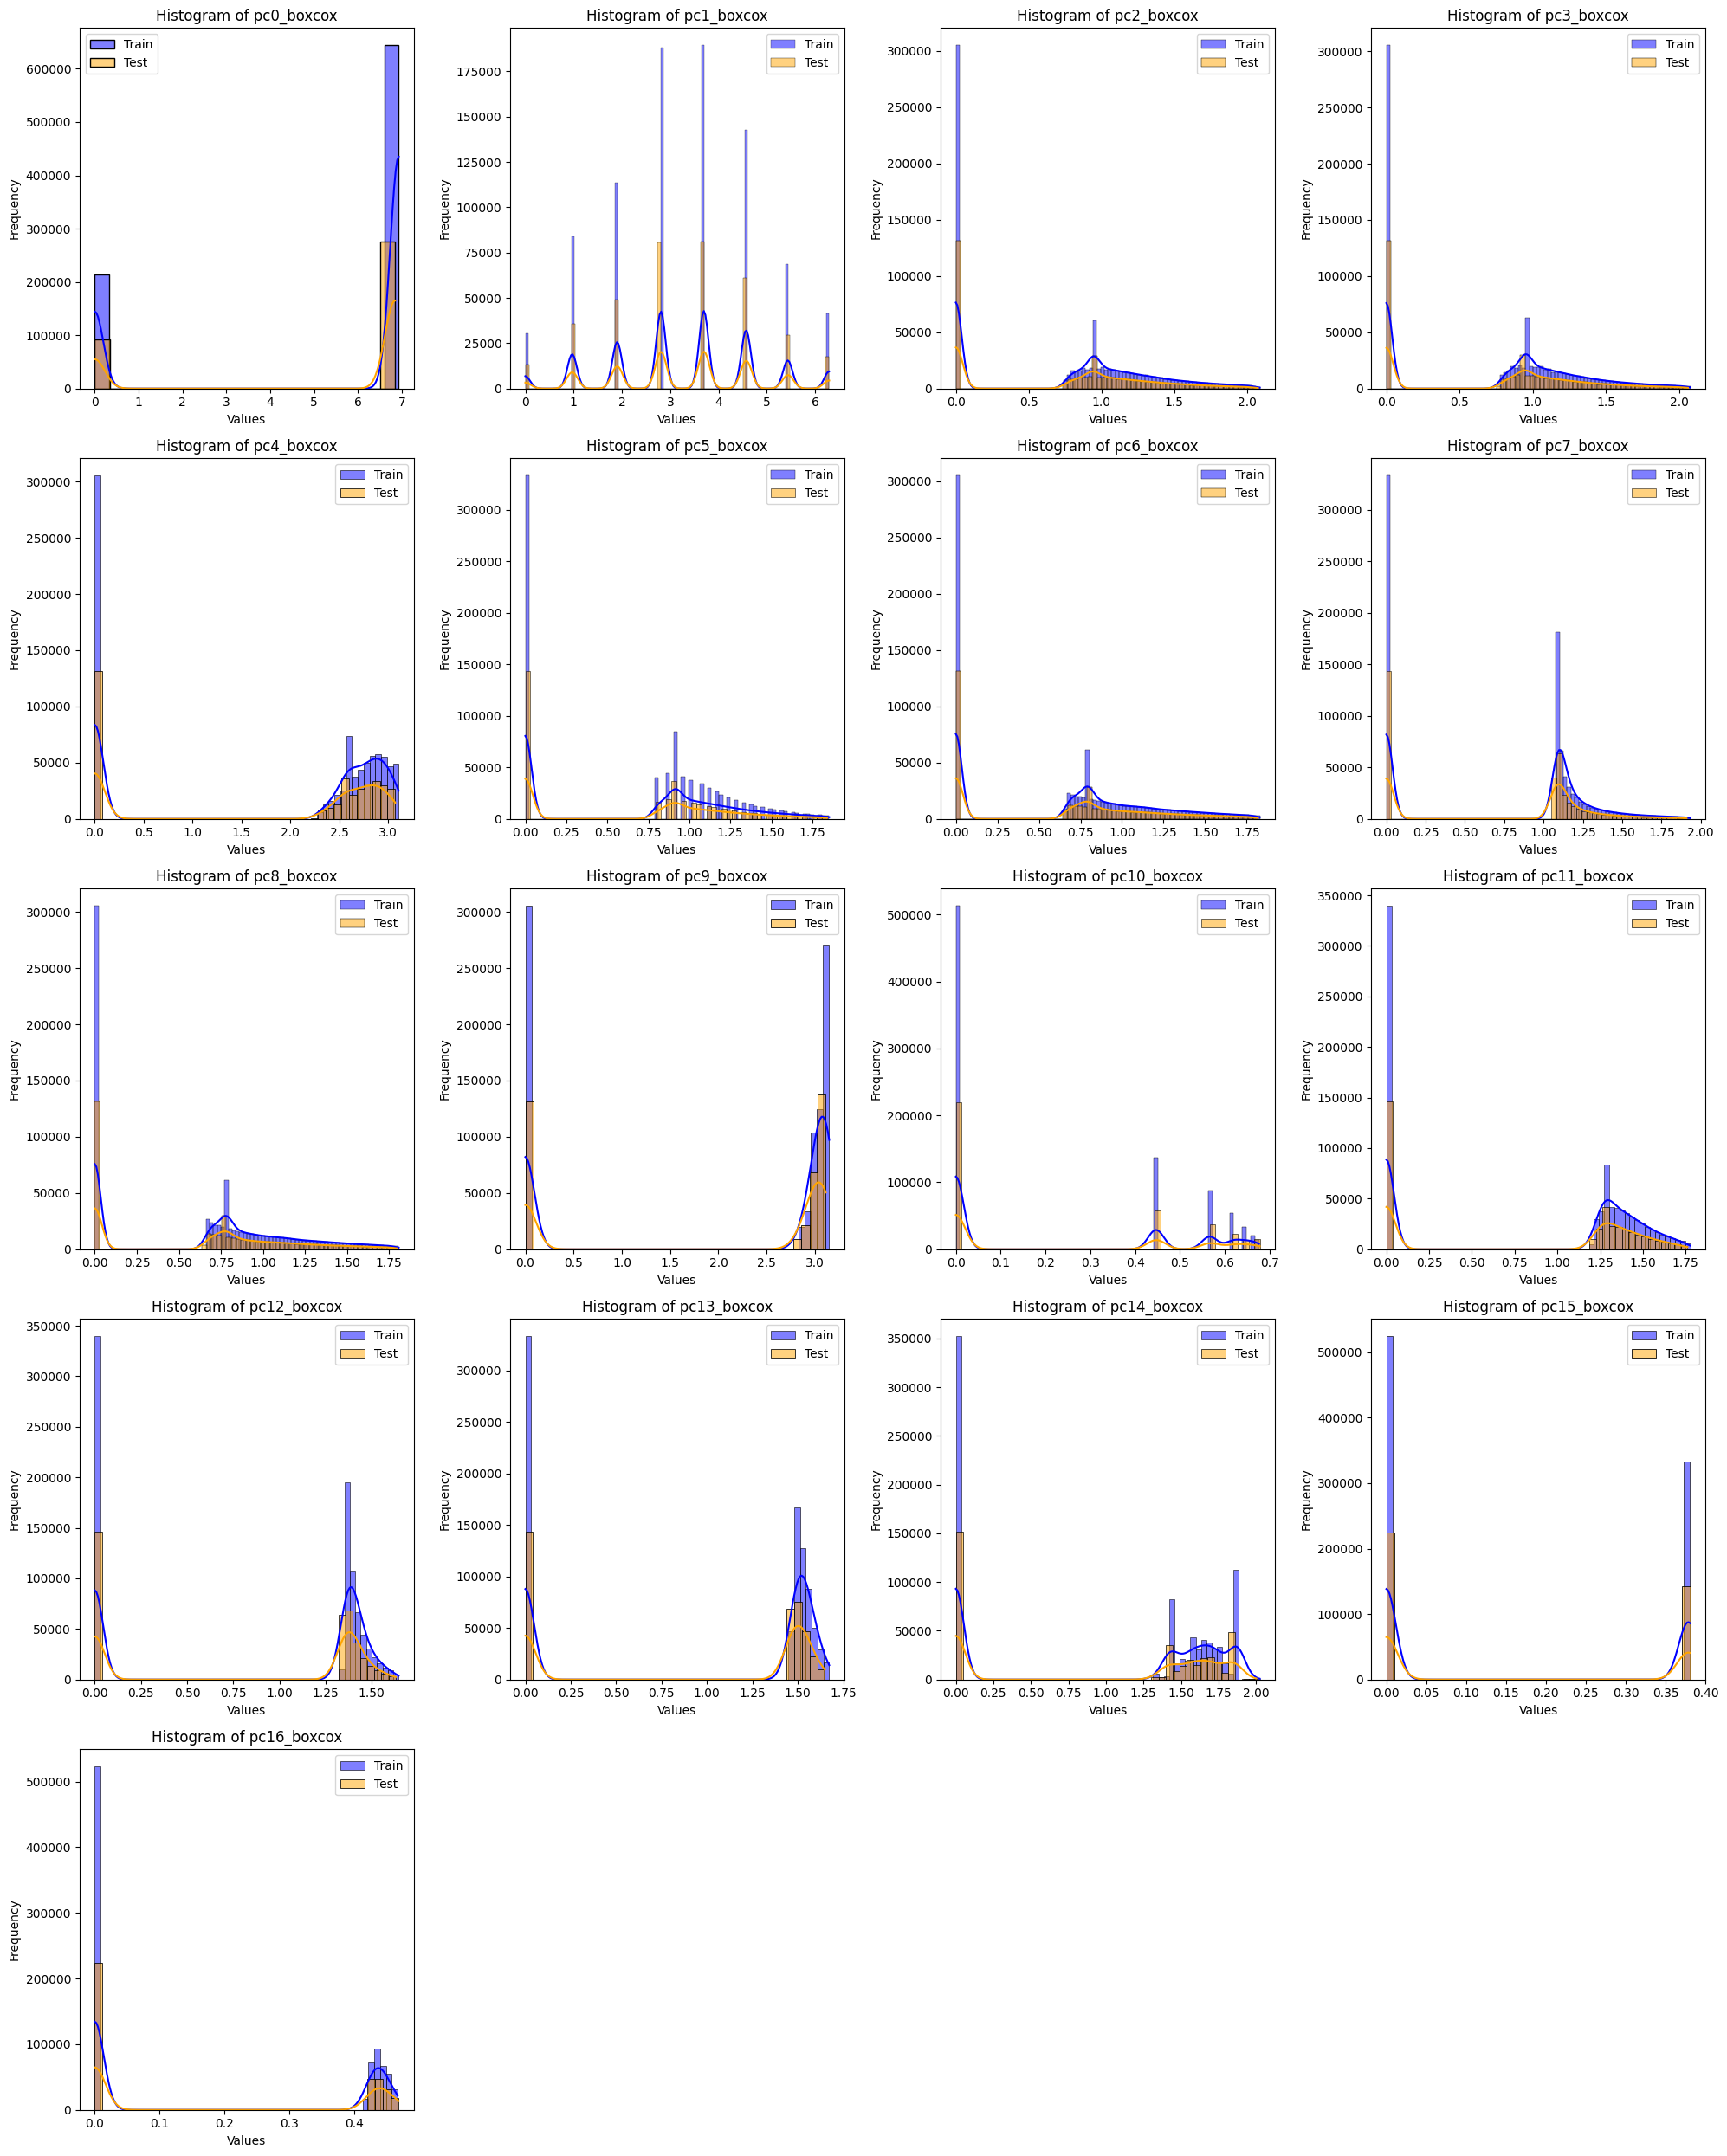

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe yang berisi hasil transformasi Box-Cox
# Misalnya df_train1_outliers_imputed dan df_test1_outliers_imputed

# Menghitung jumlah data
num_features = len(data)

# Menghitung jumlah baris yang dibutuhkan untuk plot
num_rows = (num_features + 3) // 4

# Plot histogram dengan garis KDE untuk setiap pc_boxcox dalam data latih dan data uji
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, ax in zip(data, axes):
    sns.histplot(df_train1_outliers_imputed[f'pc{i}_boxcox'], kde=True, label='Train', color='blue', alpha=0.5, ax=ax)
    sns.histplot(df_test1_outliers_imputed[f'pc{i}_boxcox'], kde=True, label='Test', color='orange', alpha=0.5, ax=ax)
    ax.set_title(f'Histogram of pc{i}_boxcox')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.legend()

# Menghilangkan axes yang tidak digunakan
for ax in axes[num_features:]:
    ax.remove()

plt.tight_layout()
plt.show()


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for i in data:
  df_train1_outliers_imputed[f'pc{i}_scaled'] = scaler.fit_transform(df_train1_outliers_imputed[[f'pc{i}_boxcox']])
  df_test1_outliers_imputed[f'pc{i}_scaled'] = scaler.fit_transform(df_test1_outliers_imputed[[f'pc{i}_boxcox']])

In [53]:
# Menampilkan hasil transformasi Box-Cox
scaled_train = [col for col in df_train1_outliers_imputed.columns if '_scaled' in col]
df_train_boxcox = df_train1_outliers_imputed[scaled_train]
df_train_boxcox.head()

,pc0_scaled,pc1_scaled,pc2_scaled,pc3_scaled,pc4_scaled,pc5_scaled,pc6_scaled,pc7_scaled,pc8_scaled,pc9_scaled,pc10_scaled,pc11_scaled,pc12_scaled,pc13_scaled,pc14_scaled,pc15_scaled,pc16_scaled
0,1.0,0.154292,0.431694,0.448157,0.952575,0.522427,0.423447,0.581613,0.426533,0.984762,0.660339,0.721873,0.841641,0.947775,0.815275,0.996464,0.944562
1,0.0,0.000000,0.469793,0.478256,0.902279,0.522427,0.598823,0.683374,0.602012,0.990505,0.660339,0.782666,0.832720,0.920658,0.703119,0.994327,0.944562
2,1.0,0.446521,0.656896,0.594777,0.765115,0.649628,0.736654,0.634092,0.731274,0.968251,0.660339,0.959413,0.867546,0.920374,0.827673,0.991748,0.908069
3,0.0,0.726957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.0,0.154292,0.421534,0.421353,0.797573,0.435897,0.391804,0.559085,0.392131,0.913050,0.000000,0.916060,0.957010,0.893925,0.000000,0.000000,0.000000


In [58]:
# Menampilkan hasil transformasi Box-Cox
scaled_test = [col for col in df_test1_outliers_imputed.columns if '_scaled' in col]
df_test_boxcox = df_test1_outliers_imputed[scaled_test]
df_test_boxcox.head()

,pc0_scaled,pc1_scaled,pc2_scaled,pc3_scaled,pc4_scaled,pc5_scaled,pc6_scaled,pc7_scaled,pc8_scaled,pc9_scaled,pc10_scaled,pc11_scaled,pc12_scaled,pc13_scaled,pc14_scaled,pc15_scaled,pc16_scaled
0,1.0,0.302252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.726878,0.474778,0.494688,0.963524,0.627199,0.526313,0.699785,0.530704,0.995802,0.836578,0.710561,0.825524,0.967511,0.816561,0.997851,0.944253
2,1.0,0.864203,0.723831,0.655440,0.775665,0.577213,0.587795,0.587474,0.568809,0.911161,0.659518,0.947134,0.961266,0.890911,0.704960,0.991470,0.923013
3,0.0,0.446407,0.693005,0.608272,0.832592,0.651151,0.459634,0.567348,0.435141,0.949269,0.659518,0.720045,0.831002,0.917519,0.704960,0.991585,0.907590
4,1.0,0.726878,0.810634,0.654315,0.832592,0.674466,0.614046,0.611821,0.570080,0.949269,0.836578,0.720045,0.831002,0.911965,0.838736,0.991984,0.931768


### Save to csv

In [73]:
from google.colab import files

# Data Train
df_train_finish_01 = pd.concat([df_train[['user_id', 'label']], df_train_boxcox], axis=1)
df_train_finish_01.to_csv('df_train_finish_01.csv', index=False)

# Data Test
df_test_finish_01 = pd.concat([df_test[['user_id']], df_test_boxcox], axis=1)
df_test_finish_01.to_csv('df_test_finish_01.csv', index=False)

# Mendownload file df_train_finish_01.csv
files.download('df_train_finish_01.csv')

# Mendownload file df_test_finish_01.csv
files.download('df_test_finish_01.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train Dataset *(ABAIKAN DULU KEBAWAH)*

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857899 entries, 0 to 857898
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  857899 non-null  int64  
 1   pc0      857899 non-null  float64
 2   pc1      857899 non-null  float64
 3   pc2      857899 non-null  float64
 4   pc3      857899 non-null  float64
 5   pc4      857899 non-null  float64
 6   pc5      857899 non-null  float64
 7   pc6      857899 non-null  float64
 8   pc7      857899 non-null  float64
 9   pc8      857899 non-null  float64
 10  pc9      857899 non-null  float64
 11  pc10     857899 non-null  float64
 12  pc11     857899 non-null  float64
 13  pc12     857899 non-null  float64
 14  pc13     857899 non-null  float64
 15  pc14     857899 non-null  float64
 16  pc15     857899 non-null  float64
 17  pc16     857899 non-null  float64
 18  label    857899 non-null  int64  
dtypes: float64(17), int64(2)
memory usage: 124.4 MB


In [10]:
df_train.duplicated().sum() # No duplicated data

0

In [11]:
df_train.isna().sum() # No missing values

user_id    0
pc0        0
pc1        0
pc2        0
pc3        0
pc4        0
pc5        0
pc6        0
pc7        0
pc8        0
pc9        0
pc10       0
pc11       0
pc12       0
pc13       0
pc14       0
pc15       0
pc16       0
label      0
dtype: int64

In [12]:
df_train['pc10'].unique()

array([1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 8.000e+00,
       6.000e+00, 1.600e+01, 5.000e+00, 9.000e+00, 1.000e+01, 7.000e+00,
       2.200e+01, 2.800e+01, 1.100e+01, 1.200e+01, 1.500e+01, 1.900e+01,
       1.700e+01, 2.000e+01, 2.100e+01, 5.100e+01, 1.800e+01, 1.400e+01,
       4.800e+01, 3.300e+01, 2.300e+01, 1.300e+01, 4.900e+01, 3.700e+01,
       4.300e+01, 2.600e+01, 3.900e+01, 6.500e+01, 7.000e+01, 4.100e+01,
       4.000e+01, 2.700e+01, 4.200e+01, 5.000e+01, 3.800e+01, 7.500e+01,
       2.500e+01, 9.500e+01, 4.400e+01, 2.400e+01, 1.270e+02, 5.500e+01,
       2.900e+01, 1.730e+02, 3.000e+01, 5.800e+01, 8.300e+01, 3.100e+01,
       9.900e+01, 1.360e+02, 5.200e+01, 4.600e+01, 3.500e+01, 3.600e+01,
       1.120e+02, 4.500e+01, 4.700e+01, 3.400e+01, 3.200e+01, 6.000e+01,
       9.400e+01, 1.090e+02, 9.800e+01, 8.700e+01, 6.200e+01, 1.570e+02,
       5.600e+01, 1.490e+02, 1.050e+02, 2.020e+02, 8.000e+01, 9.600e+01,
       4.030e+02, 2.030e+02, 5.400e+01, 1.260e+02, 

Identify which feature is discrete or continuous

KeyError: 'label'

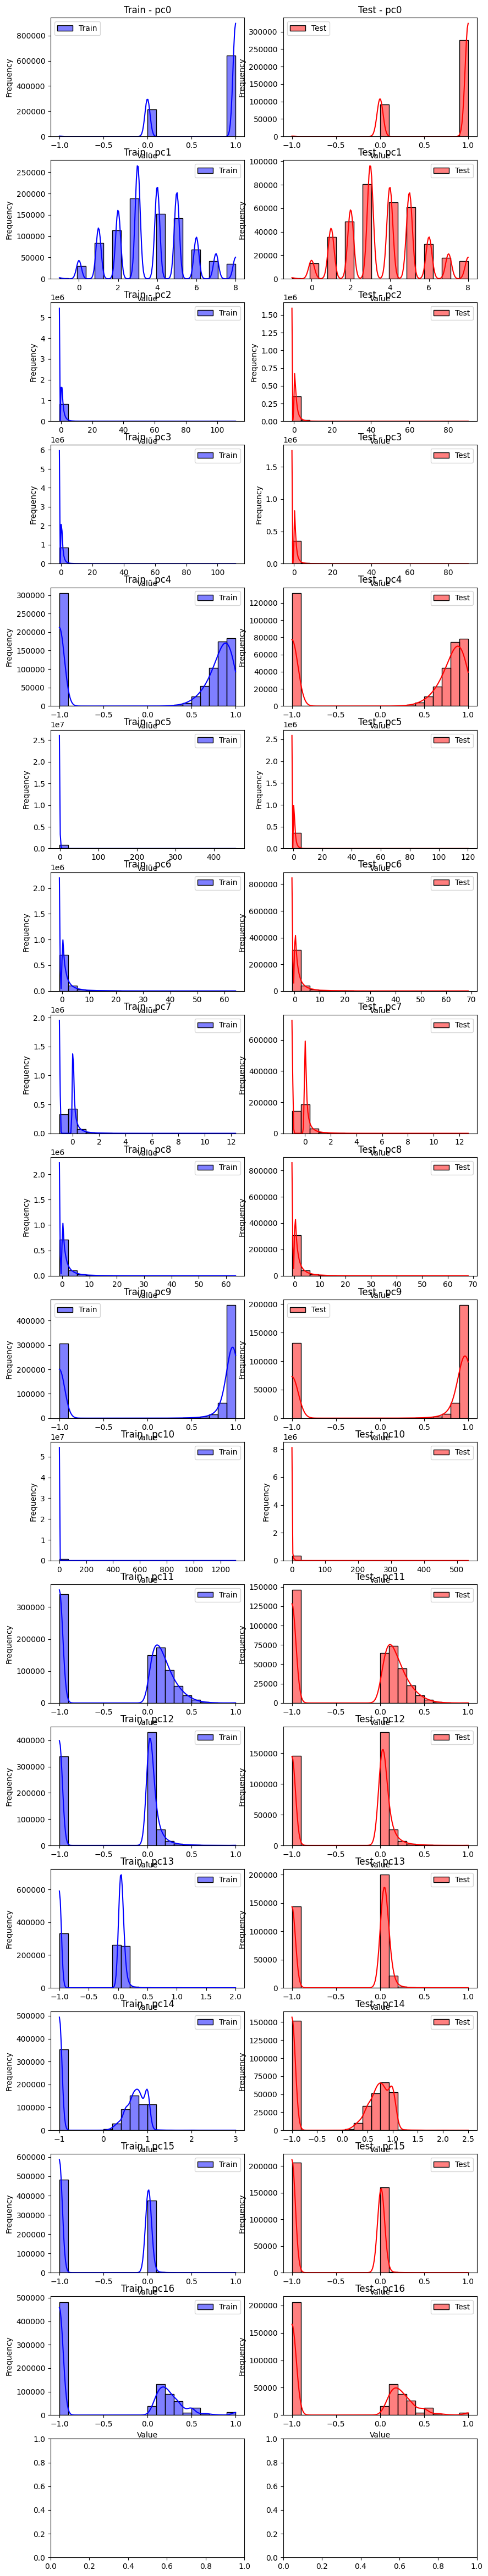

In [ ]:
cont_cols=[f for f in df_train1.columns if df_train1[f].dtype in [float,int]]

# Create subplots for each continuous column
fig, axs = plt.subplots(len(cont_cols), 2, figsize=(10,60))

# Loop through each continuous column and plot the histograms
for i, col in enumerate(cont_cols):
    # Determine the range of values to plot
    max_val = max(df_train1[col].max(), df_test[col].max())
    min_val = min(df_train1[col].min(), df_test[col].min())
    range_val = max_val - min_val

    # Determine the bin size and number of bins
    bin_size = range_val / 20
    num_bins_train = round(range_val / bin_size)
    num_bins_test = round(range_val / bin_size)

    # Plot the histograms
    sns.histplot(df_train1[col], ax=axs[i][0], color='blue', kde=True, label='Train', bins=num_bins_train)
    sns.histplot(df_test[col], ax=axs[i][1], color='red', kde=True, label='Test', bins=num_bins_test)
    axs[i][0].set_title(f'Train - {col}')
    axs[i][0].set_xlabel('Value')
    axs[i][0].set_ylabel('Frequency')
    axs[i][1].set_title(f'Test - {col}')
    axs[i][1].set_xlabel('Value')
    axs[i][1].set_ylabel('Frequency')
    axs[i][0].legend()
    axs[i][1].legend()

plt.tight_layout()
plt.show()

Looks all the features, both train and test data, well-distributed. It turns out that the data is continuous, EXCEPT pc2, pc3, pc5, pc10, pc15.

To make sure that the data is discrete data, let's call them by n unique

Check what will happen if we rescale all the dataset with the same scaler

In [16]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857899 entries, 0 to 857898
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pc0     857899 non-null  float64
 1   pc1     857899 non-null  float64
 2   pc2     857899 non-null  float64
 3   pc3     857899 non-null  float64
 4   pc4     857899 non-null  float64
 5   pc5     857899 non-null  float64
 6   pc6     857899 non-null  float64
 7   pc7     857899 non-null  float64
 8   pc8     857899 non-null  float64
 9   pc9     857899 non-null  float64
 10  pc10    857899 non-null  float64
 11  pc11    857899 non-null  float64
 12  pc12    857899 non-null  float64
 13  pc13    857899 non-null  float64
 14  pc14    857899 non-null  float64
 15  pc15    857899 non-null  float64
 16  pc16    857899 non-null  float64
dtypes: float64(17)
memory usage: 111.3 MB


In [31]:
df_test.head(2)

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,4,1.0,2.0,-1.000,-1.00,-1.00000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.00000,-1.000000,-1.000000,-1.00,-1.000000,-1.00
1,13,1.0,5.0,0.445,0.42,0.94382,0.8,0.783,0.234,0.778,0.993614,2.0,0.05618,0.006386,0.095238,0.75,0.022472,0.25


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train1_scaled = pd.DataFrame(scaler.fit_transform(df_train1), columns = df_train1.columns)
print(df_train1_scaled.head())

df_test_scaled = pd.DataFrame(scaler.fit_transform(df_test), columns = df_test.columns)
print(df_test_scaled.head())

        pc0       pc1       pc2       pc3       pc4       pc5       pc6  \
0  0.575908 -1.400115 -0.139259 -0.077388  0.854587  0.047264 -0.253512   
1 -1.699238 -1.916943 -0.059422 -0.015123  0.765476  0.047264  0.105379   
2  0.575908 -0.366459  0.396424  0.245255  0.513872  0.326454  0.514507   
3 -1.699238  0.667198 -0.795986 -0.787767 -1.335004 -0.734470 -0.708902   
4  0.575908 -1.400115 -0.159862 -0.131161  0.574625 -0.120251 -0.304111   

        pc7       pc8       pc9      pc10      pc11      pc12      pc13  \
0  0.409211 -0.244168  0.778206 -0.094246  0.603161  0.730950  0.829058   
1  0.653164  0.117789  0.787549 -0.094246  0.736242  0.714283  0.783462   
2  0.535493  0.499670  0.751244 -0.094246  1.111994  0.779049  0.782982   
3 -1.083205 -0.706852 -1.341947 -0.374738 -1.216932 -1.226363 -1.251256   
4  0.354681 -0.299513  0.659962 -0.374738  1.021264  0.941888  0.738044   

       pc14      pc15      pc16  
0  0.821847  1.138614  1.071850  
1  0.536225  1.125600  1.07185

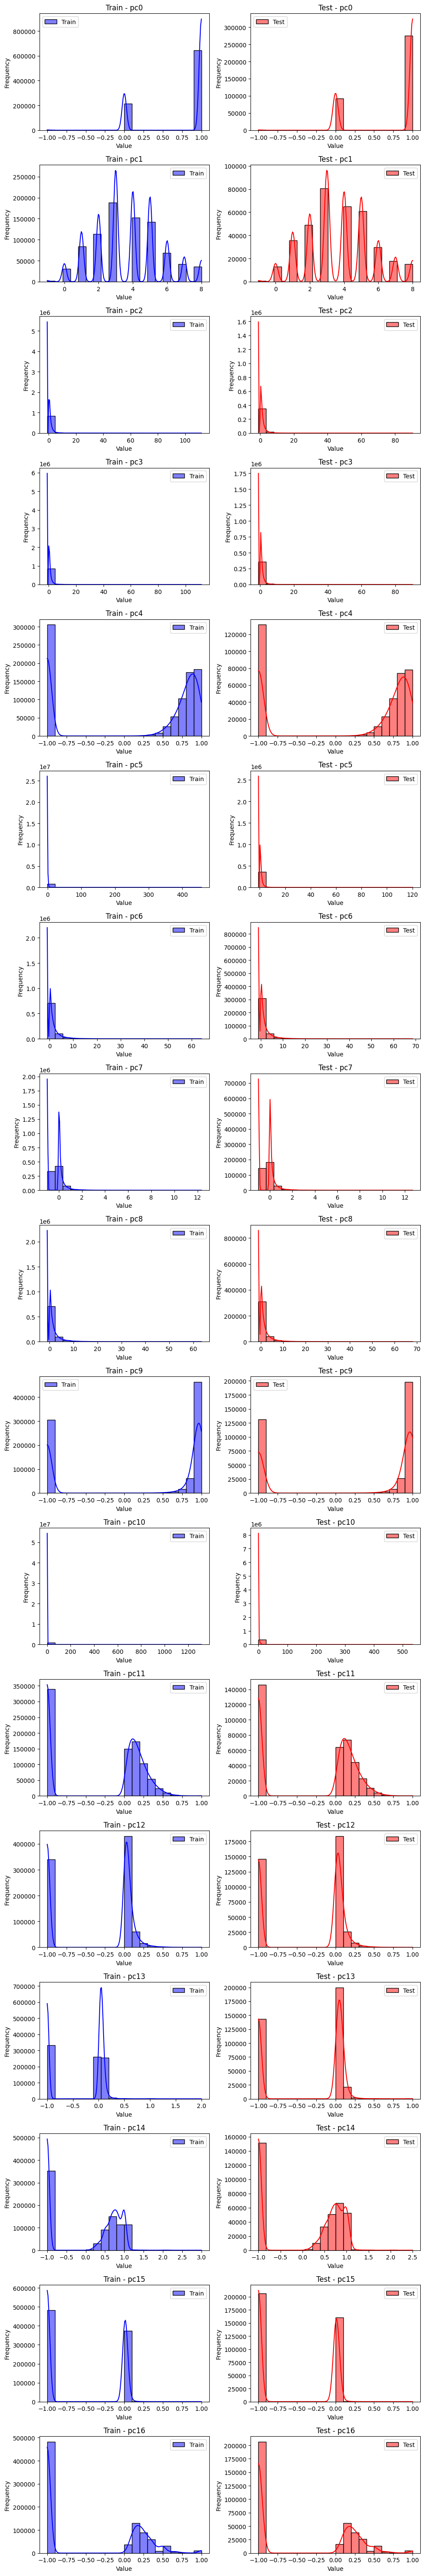

In [27]:
cont_cols1=[f for f in df_train1_scaled.columns if df_train1_scaled[f].dtype in [float,int]]

# Create subplots for each continuous column
fig, axs = plt.subplots(len(cont_cols1), 2, figsize=(10,60))

# Loop through each continuous column and plot the histograms
for i, col in enumerate(cont_cols1):
    # Determine the range of values to plot
    max_val = max(df_train1_scaled[col].max(), df_test[col].max())
    min_val = min(df_train1_scaled[col].min(), df_test[col].min())
    range_val = max_val - min_val

    # Determine the bin size and number of bins
    bin_size = range_val / 20
    num_bins_train = round(range_val / bin_size)
    num_bins_test = round(range_val / bin_size)

    # Plot the histograms
    sns.histplot(df_train1[col], ax=axs[i][0], color='blue', kde=True, label='Train', bins=num_bins_train)
    sns.histplot(df_test[col], ax=axs[i][1], color='red', kde=True, label='Test', bins=num_bins_test)
    axs[i][0].set_title(f'Train - {col}')
    axs[i][0].set_xlabel('Value')
    axs[i][0].set_ylabel('Frequency')
    axs[i][1].set_title(f'Test - {col}')
    axs[i][1].set_xlabel('Value')
    axs[i][1].set_ylabel('Frequency')
    axs[i][0].legend()
    axs[i][1].legend()

plt.tight_layout()
plt.show()

In [35]:
df_train1_scaled.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,0.575908,-1.400115,-0.139259,-0.077388,0.854587,0.047264,-0.253512,0.409211,-0.244168,0.778206,-0.094246,0.603161,0.730950,0.829058,0.821847,1.138614,1.071850
1,-1.699238,-1.916943,-0.059422,-0.015123,0.765476,0.047264,0.105379,0.653164,0.117789,0.787549,-0.094246,0.736242,0.714283,0.783462,0.536225,1.125600,1.071850
2,0.575908,-0.366459,0.396424,0.245255,0.513872,0.326454,0.514507,0.535493,0.499670,0.751244,-0.094246,1.111994,0.779049,0.782982,0.853583,1.110061,0.856401
3,-1.699238,0.667198,-0.795986,-0.787767,-1.335004,-0.734470,-0.708902,-1.083205,-0.706852,-1.341947,-0.374738,-1.216932,-1.226363,-1.251256,-1.177506,-0.883185,-0.867190
4,0.575908,-1.400115,-0.159862,-0.131161,0.574625,-0.120251,-0.304111,0.354681,-0.299513,0.659962,-0.374738,1.021264,0.941888,0.738044,-1.177506,-0.883185,-0.867190


In [40]:

df_test.describe()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
count,3.677020e+05,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000,367702.000000
mean,1.846733e+06,0.746082,3.707519,0.548174,0.393795,0.172392,0.317049,0.966813,-0.246681,0.920817,0.248578,1.346014,-0.283819,-0.360005,-0.353226,0.028216,-0.554844,-0.440620
std,1.068780e+06,0.439969,1.935365,1.948030,1.772834,0.880674,1.738704,2.791356,0.699443,2.734626,0.933026,3.514389,0.590000,0.523162,0.518760,0.875934,0.503653,0.644444
min,4.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,9.194445e+05,0.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.844812e+06,1.000000,4.000000,0.360000,0.290000,0.736264,0.300000,0.309000,0.011000,0.284000,0.922222,0.000000,0.068582,0.011779,0.029091,0.500000,-1.000000,-1.000000
75%,2.773638e+06,1.000000,5.000000,1.150000,0.920000,0.883721,0.900000,1.505000,0.114000,1.437000,0.977305,2.000000,0.187500,0.044960,0.057143,0.800000,0.008230,0.200000
max,3.700544e+06,1.000000,8.000000,90.390000,90.160000,1.000000,120.200000,68.646000,12.679000,68.027000,1.000000,534.000000,1.000000,1.000000,1.000000,2.500000,1.000000,1.000000


In [41]:
df_train1.describe()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
count,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.00000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000
mean,0.746870,3.709053,0.545364,0.391718,0.175067,0.315356,0.961431,-0.245161,0.91576,0.251290,1.336002,-0.282764,-0.358987,-0.351351,0.030651,-0.555226,-0.440967
std,0.439532,1.934880,1.941448,1.766663,0.880198,1.790893,2.766861,0.696857,2.71027,0.932444,3.565165,0.589381,0.522695,0.518399,0.875284,0.503602,0.644649
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,4.000000,0.365000,0.295000,0.738007,0.300000,0.312000,0.011000,0.28700,0.922936,0.000000,0.068966,0.011834,0.029297,0.500000,-1.000000,-1.000000
75%,1.000000,5.000000,1.150000,0.915000,0.884120,0.900000,1.501000,0.114000,1.43400,0.977522,2.000000,0.187500,0.044816,0.057143,0.800000,0.008230,0.200000
max,1.000000,8.000000,111.815000,111.475000,1.000000,456.300000,64.119000,12.338000,63.41600,1.000000,1313.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000


In [42]:
df_test_scaled.describe()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
count,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05,3.677020e+05
mean,-2.968147e-17,-8.355643e-17,9.120869e-17,-1.375860e-17,1.102620e-16,5.973010e-17,4.251252e-18,6.604900e-17,-1.327164e-16,6.268665e-17,-5.864796e-17,-1.213539e-17,-5.982672e-17,1.200592e-16,-1.275376e-17,3.794243e-17,2.510944e-16,-8.011678e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.727887e+00,-3.968658e+00,-2.432371e+00,-7.947395e-01,-7.861973e-01,-1.331246e+00,-7.574895e-01,-7.046097e-01,-1.077029e+00,-7.024067e-01,-1.338205e+00,-3.830014e-01,-1.213869e+00,-1.223322e+00,-1.246770e+00,-1.173852e+00,-8.838551e-01,-8.680057e-01
25%,-8.676152e-01,-1.695765e+00,-8.822733e-01,-7.947395e-01,-7.861973e-01,-1.331246e+00,-7.574895e-01,-7.046097e-01,-1.077029e+00,-7.024067e-01,-1.338205e+00,-3.830014e-01,-1.213869e+00,-1.223322e+00,-1.246770e+00,-1.173852e+00,-8.838551e-01,-8.680057e-01
50%,-1.797604e-03,5.771275e-01,1.511249e-01,-9.659726e-02,-5.854769e-02,6.402742e-01,-9.805354e-03,-2.356613e-01,3.684094e-01,-2.328720e-01,7.220008e-01,-3.830014e-01,5.972913e-01,7.106474e-01,7.369831e-01,5.386071e-01,-8.838551e-01,-8.680057e-01
75%,8.672555e-01,5.771275e-01,6.678240e-01,3.089412e-01,2.968161e-01,8.077112e-01,3.352797e-01,1.928050e-01,5.156698e-01,1.887584e-01,7.810376e-01,1.860884e-01,7.988471e-01,7.740728e-01,7.910581e-01,8.810989e-01,1.117982e+00,9.940676e-01
max,1.734513e+00,5.771275e-01,2.217921e+00,4.611939e+01,5.063437e+01,9.397456e-01,6.894968e+01,2.424603e+01,1.848000e+01,2.453947e+01,8.053617e-01,1.515640e+02,2.175968e+00,2.599588e+00,2.608581e+00,2.821886e+00,3.087135e+00,2.235450e+00


In [43]:
df_train1_scaled.describe()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
count,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05,8.578990e+05
mean,3.965593e-17,-2.627164e-17,-2.476425e-17,1.084492e-16,-3.373405e-17,8.972279e-17,-9.200044e-17,-8.124994e-17,-2.279305e-17,3.809471e-17,-1.933724e-17,3.263249e-17,1.350521e-16,1.464321e-16,-6.816381e-18,-2.336122e-16,-2.641576e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.974384e+00,-2.433771e+00,-7.959857e-01,-7.877670e-01,-1.335004e+00,-7.344696e-01,-7.089018e-01,-1.083205e+00,-7.068524e-01,-1.341947e+00,-3.747381e-01,-1.216932e+00,-1.226363e+00,-1.251256e+00,-1.177506e+00,-8.831851e-01,-8.671899e-01
25%,-1.699238e+00,-8.832868e-01,-7.959857e-01,-7.877670e-01,-1.335004e+00,-7.344696e-01,-7.089018e-01,-1.083205e+00,-7.068524e-01,-1.341947e+00,-3.747381e-01,-1.216932e+00,-1.226363e+00,-1.251256e+00,-1.177506e+00,-8.831851e-01,-8.671899e-01
50%,5.759078e-01,1.503695e-01,-9.290188e-02,-5.474614e-02,6.395609e-01,-8.574369e-03,-2.347179e-01,3.675958e-01,-2.319917e-01,7.203076e-01,-3.747381e-01,5.967785e-01,7.094407e-01,7.342766e-01,5.362251e-01,-8.831851e-01,-8.671899e-01
75%,5.759078e-01,6.671976e-01,3.114357e-01,2.961982e-01,8.055609e-01,3.264542e-01,1.950112e-01,5.154024e-01,1.912135e-01,7.788483e-01,1.862461e-01,7.978956e-01,7.725402e-01,7.879920e-01,8.789714e-01,1.118854e+00,9.942887e-01
max,5.759078e-01,2.217682e+00,5.731273e+01,6.287750e+01,9.372130e-01,2.546131e+02,2.282645e+01,1.805703e+01,2.306053e+01,8.029552e-01,3.679114e+02,2.176462e+00,2.599963e+00,4.535799e+00,3.392444e+00,3.088206e+00,2.235274e+00


In [30]:
print(df_train1_scaled.nunique())
print(df_train1.nunique())

pc0          3
pc1         10
pc2       4019
pc3       3862
pc4      77725
pc5        421
pc6      17912
pc7       4371
pc8      17698
pc9     212600
pc10       140
pc11     77725
pc12    212600
pc13     29819
pc14      3284
pc15     16010
pc16      2280
dtype: int64
pc0          3
pc1         10
pc2       4019
pc3       3862
pc4      77725
pc5        421
pc6      17912
pc7       4371
pc8      17698
pc9     212600
pc10       140
pc11     77725
pc12    212600
pc13     29819
pc14      3284
pc15     16010
pc16      2280
dtype: int64


In [34]:
print(df_test_scaled.nunique())
print(df_test.nunique())

user_id    367702
pc0             3
pc1            10
pc2          3155
pc3          2980
pc4         48290
pc5           353
pc6         14444
pc7          3572
pc8         14197
pc9        115047
pc10          114
pc11        48290
pc12       115047
pc13        19699
pc14         2198
pc15        10880
pc16         1566
dtype: int64
user_id    367702
pc0             3
pc1            10
pc2          3155
pc3          2980
pc4         48290
pc5           353
pc6         14444
pc7          3572
pc8         14197
pc9        115047
pc10          114
pc11        48290
pc12       115047
pc13        19699
pc14         2198
pc15        10880
pc16         1566
dtype: int64


In [ ]:
df_train1[['pc0', 'pc1']]

,pc0,pc1
0,1.0,1.0
1,0.0,0.0
2,1.0,3.0
3,0.0,5.0
4,1.0,1.0
...,...,...
857894,1.0,4.0
857895,1.0,3.0
857896,1.0,0.0
857897,1.0,5.0


From the analytics above, we can conclude that the feature with n unique < 10 is probably a discrete value

So lets visualize discrete data values

In [ ]:
print(df_train1.pc0.value_counts())
print(df_train1.pc1.value_counts())

pc0
 1.0    642512
 0.0    213614
-1.0      1773
Name: count, dtype: int64
pc1
 3.0    188164
 4.0    152179
 5.0    142543
 2.0    113366
 1.0     83841
 6.0     68700
 7.0     41545
 8.0     35532
 0.0     30255
-1.0      1774
Name: count, dtype: int64


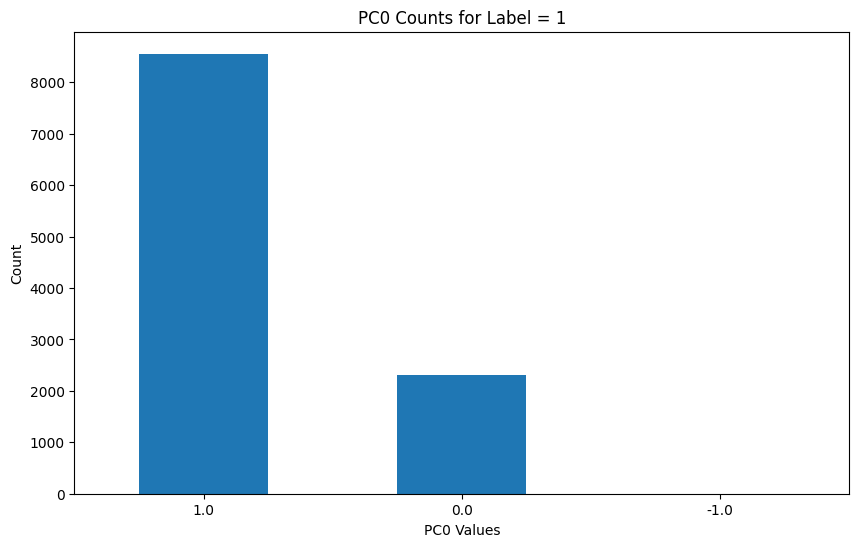

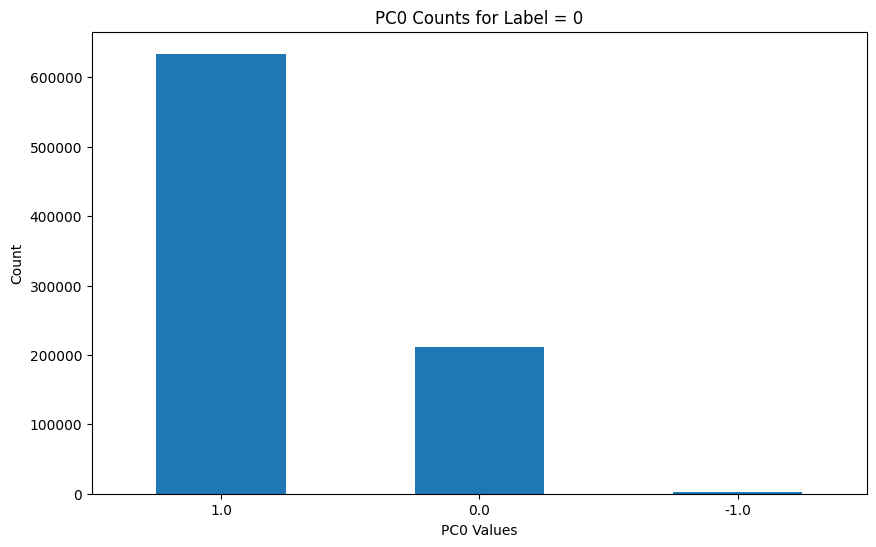

In [ ]:
# Filter data untuk label = 1
df_pc0_label1 = df_train1[df_train1['label'] == 1]

# Menghitung nilai pc1 berdasarkan label=1
pc0_counts_label1 = df_pc0_label1['pc0'].value_counts()

# Filter data untuk label = 1
df_pc0_label0 = df_train1[df_train1['label'] == 0]

# Menghitung nilai pc1 berdasarkan label=1
pc0_counts_label0 = df_pc0_label0['pc0'].value_counts()

# Plot bar chart untuk pc1 berdasarkan label=1
plt.figure(figsize=(10, 6))
pc0_counts_label1.plot(kind='bar')
plt.title('PC0 Counts for Label = 1')
plt.xlabel('PC0 Values')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot bar chart untuk pc1 berdasarkan label=1
plt.figure(figsize=(10, 6))
pc0_counts_label0.plot(kind='bar')
plt.title('PC0 Counts for Label = 0')
plt.xlabel('PC0 Values')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

From the barchart above, we can see that only -1 value is not in the label = 1 (fraud) class

Lets visualize the pc1 value

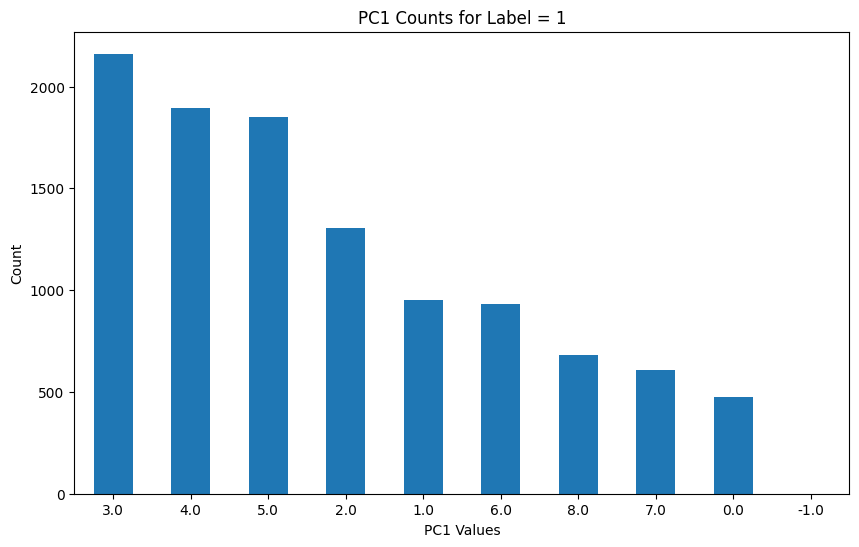

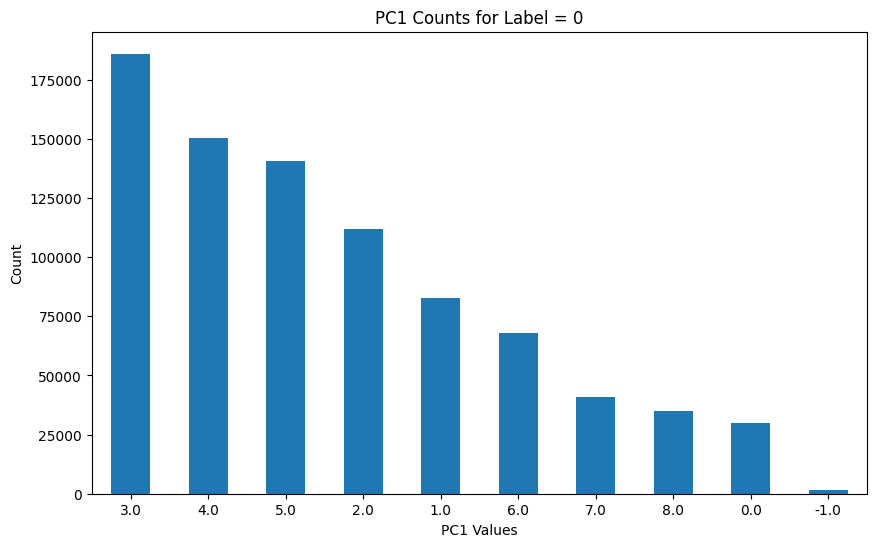

In [ ]:
# Filter data untuk label = 1
df_pc1_label1 = df_train1[df_train1['label'] == 1]

# Menghitung nilai pc1 berdasarkan label=1
pc1_counts_label1 = df_pc1_label1['pc1'].value_counts()

# Filter data untuk label = 1
df_pc1_label0 = df_train1[df_train1['label'] == 0]

# Menghitung nilai pc1 berdasarkan label=1
pc1_counts_label0 = df_pc1_label0['pc1'].value_counts()

# Plot bar chart untuk pc1 berdasarkan label=1
plt.figure(figsize=(10, 6))
pc1_counts_label1.plot(kind='bar')
plt.title('PC1 Counts for Label = 1')
plt.xlabel('PC1 Values')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot bar chart untuk pc1 berdasarkan label=1
plt.figure(figsize=(10, 6))
pc1_counts_label0.plot(kind='bar')
plt.title('PC1 Counts for Label = 0')
plt.xlabel('PC1 Values')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

From the barchart above, we can see that -1 value is not in the label = 1 (fraud) class

      Mutual Information
pc0             0.165562
pc16            0.083683
pc15            0.078998
pc14            0.054465
pc11            0.045565
pc12            0.045307
pc13            0.044585
pc7             0.044110
pc4             0.037847
pc9             0.036403
pc1             0.030334
pc5             0.024155
pc2             0.020610
pc3             0.020449
pc8             0.011851
pc6             0.011720
pc10            0.005874


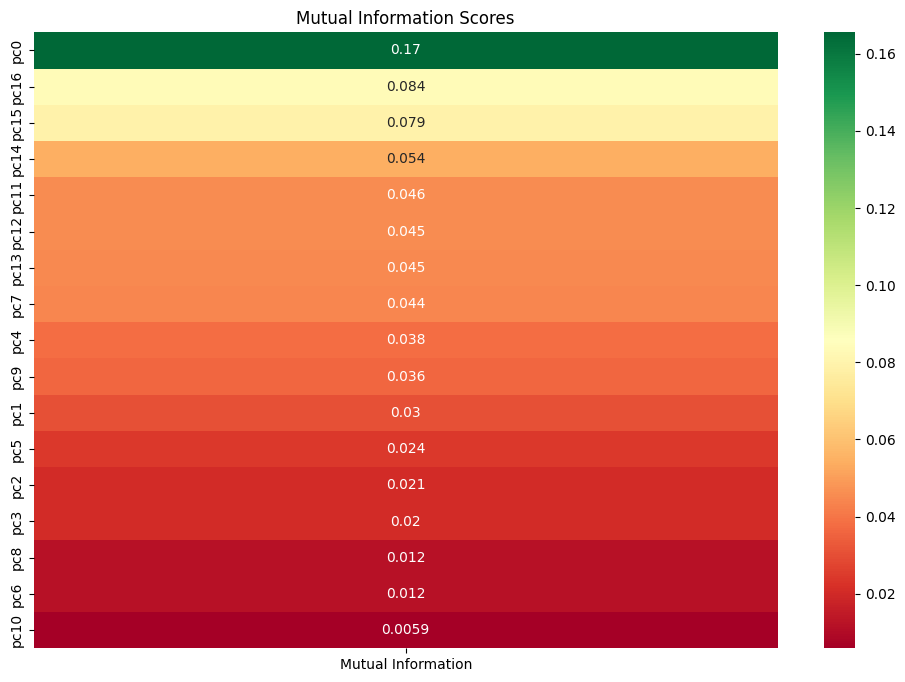

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Memisahkan fitur dan label
X = df_train1.drop(['label'], axis=1)
y = df_train['label']

# Menghitung mutual information
mutual_info = mutual_info_classif(X, y, discrete_features = "auto")

# Membuat DataFrame untuk mutual information
mutual_info_df = pd.DataFrame(mutual_info, index=X.columns, columns=['Mutual Information'])

# Mengurutkan berdasarkan nilai mutual information
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Menampilkan mutual information
print(mutual_info_df)

# Membuat heatmap untuk visualisasi
plt.figure(figsize=(12, 8))
sns.heatmap(mutual_info_df, cmap='RdYlGn', annot=True)
plt.title('Mutual Information Scores')
plt.show()


From MIA graph above, we can see that only pc0 with high value than the others. In this case, we have to do feature engineering and choose the  right model

## Loan Activity Dataset

In [ ]:
df_la.head()

,user_id,reference_contact,loan_type,ts
0,2223129,903716,1,671
1,1380939,484583,1,89
2,2724411,1185034,1,230
3,2401751,1369254,1,120
4,1982168,21797,1,57


In [ ]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300999 entries, 0 to 4300998
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   user_id            int64
 1   reference_contact  int64
 2   loan_type          int64
 3   ts                 int64
dtypes: int64(4)
memory usage: 131.3 MB


In [ ]:
df_la.duplicated().sum() # No duplicated data

0

In [ ]:
df_la.isna().sum() # No missing values

user_id              0
reference_contact    0
loan_type            0
ts                   0
dtype: int64

In [ ]:
df_la.nunique()

user_id              2190662
reference_contact    2698874
loan_type                 11
ts                       821
dtype: int64

There is anomaly, which is reference_contact is alot more than user_id. It turns out that 1 user_id can have more than 1 reference contact.

In [ ]:
df_train['user_id']

0               3
1               5
2               9
3              10
4              17
           ...   
857894    3700529
857895    3700532
857896    3700537
857897    3700543
857898    3700548
Name: user_id, Length: 857899, dtype: int64

In [ ]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300999 entries, 0 to 4300998
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   user_id            int64
 1   reference_contact  int64
 2   loan_type          int64
 3   ts                 int64
dtypes: int64(4)
memory usage: 131.3 MB


In [ ]:
# Mengelompokkan data berdasarkan 'user_id' dan menghitung jumlah 'reference_contact' yang unik untuk setiap 'user_id'
df_user_id_multiref = df_la.groupby('user_id')['reference_contact'].nunique()

# Memfilter pengguna yang memiliki lebih dari satu 'reference_contact' yang unik
df_user_id_multiref = df_user_id_multiref[df_user_id_multiref > 1]

# Menampilkan hasilnya
df_user_id_multiref

user_id
5          2
9          3
10         2
12         3
13         2
          ..
3700533    2
3700539    3
3700542    3
3700544    3
3700547    2
Name: reference_contact, Length: 1241493, dtype: int64

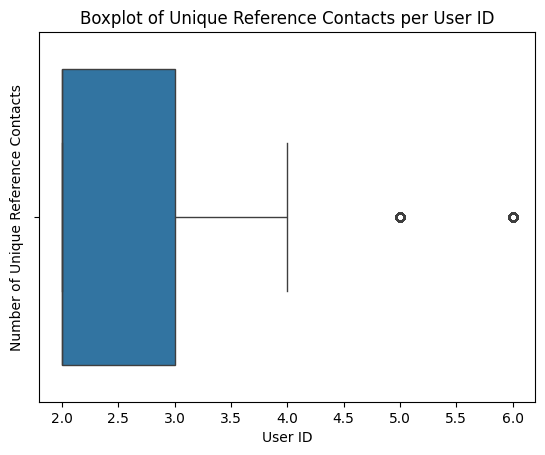

In [ ]:
# prompt: make boxplot from df_user_id_multiref

import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot of the data
sns.boxplot(x=df_user_id_multiref)

# Add a title and labels
plt.title("Boxplot of Unique Reference Contacts per User ID")
plt.xlabel("User ID")
plt.ylabel("Number of Unique Reference Contacts")

# Show the plot
plt.show()

In [ ]:
# prompt: merge df_la and df_train on user_id

df_la_train = pd.merge(df_la, df_train, on='user_id')
df_la_train.head()

,user_id,reference_contact,loan_type,ts,pc0,pc1,pc2,pc3,pc4,pc5,...,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,1982168,21797,1,57,1.0,3.0,2.76,2.170,0.786232,1.9,...,2.384,0.950179,3.0,0.213768,0.049821,0.043779,0.789474,0.005435,0.157895,0
1,1982168,330643,4,492,1.0,3.0,2.76,2.170,0.786232,1.9,...,2.384,0.950179,3.0,0.213768,0.049821,0.043779,0.789474,0.005435,0.157895,0
2,1982168,106027,5,57,1.0,3.0,2.76,2.170,0.786232,1.9,...,2.384,0.950179,3.0,0.213768,0.049821,0.043779,0.789474,0.005435,0.157895,0
3,2165537,3012160,1,264,1.0,5.0,2.43,1.935,0.796296,3.1,...,5.586,0.982413,3.0,0.203704,0.017587,0.080103,0.806452,0.006173,0.096774,0
4,2165537,3420047,5,566,1.0,5.0,2.43,1.935,0.796296,3.1,...,5.586,0.982413,3.0,0.203704,0.017587,0.080103,0.806452,0.006173,0.096774,0


In [ ]:
# prompt: pick user_id that have more than 1 reference contact

df_la_train_multi_ref = df_la_train[df_la_train.groupby('user_id')['reference_contact'].transform('nunique') > 1]
df_la_train_multi_ref.head()

,user_id,reference_contact,loan_type,ts,pc0,pc1,pc2,pc3,pc4,pc5,...,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,1982168,21797,1,57,1.0,3.0,2.76,2.170,0.786232,1.9,...,2.384,0.950179,3.0,0.213768,0.049821,0.043779,0.789474,0.005435,0.157895,0
1,1982168,330643,4,492,1.0,3.0,2.76,2.170,0.786232,1.9,...,2.384,0.950179,3.0,0.213768,0.049821,0.043779,0.789474,0.005435,0.157895,0
2,1982168,106027,5,57,1.0,3.0,2.76,2.170,0.786232,1.9,...,2.384,0.950179,3.0,0.213768,0.049821,0.043779,0.789474,0.005435,0.157895,0
3,2165537,3012160,1,264,1.0,5.0,2.43,1.935,0.796296,3.1,...,5.586,0.982413,3.0,0.203704,0.017587,0.080103,0.806452,0.006173,0.096774,0
4,2165537,3420047,5,566,1.0,5.0,2.43,1.935,0.796296,3.1,...,5.586,0.982413,3.0,0.203704,0.017587,0.080103,0.806452,0.006173,0.096774,0


## Non Borrower User Dataset

In [ ]:
df_nbu.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,0,1,5,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
1,1,0,8,0.63,0.565,0.896825,0.6,2.298,0.21,2.284,0.993908,1,0.103175,0.006092,0.053097,1.0,0.007937,0.166667
2,2,-1,-1,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
3,6,0,1,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000
4,7,1,6,-1.00,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000


In [ ]:
df_nbu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   user_id  1048575 non-null  int64  
 1   pc0      1048575 non-null  int64  
 2   pc1      1048575 non-null  int64  
 3   pc2      1048575 non-null  float64
 4   pc3      1048575 non-null  float64
 5   pc4      1048575 non-null  float64
 6   pc5      1048575 non-null  float64
 7   pc6      1048575 non-null  float64
 8   pc7      1048575 non-null  float64
 9   pc8      1048575 non-null  float64
 10  pc9      1048575 non-null  float64
 11  pc10     1048575 non-null  int64  
 12  pc11     1048575 non-null  float64
 13  pc12     1048575 non-null  float64
 14  pc13     1048575 non-null  float64
 15  pc14     1048575 non-null  float64
 16  pc15     1048575 non-null  float64
 17  pc16     1048575 non-null  float64
dtypes: float64(14), int64(4)
memory usage: 144.0 MB


In [ ]:
df_nbu['pc10'].unique()

array([  0,   1,   2,   6,   4,   3,   7,   5,  10,  15,   8,  14,   9,
        12,  25,  11,  22,  20,  34,  17,  13,  18,  83,  19,  49, 134,
        16,  26,  21,  52,  23,  31,  27,  48,  30,  39,  99, 139,  35,
        38,  32,  43,  36, 456,  29,  45,  28,  56,  24, 116,  47,  59,
        64,  37, 120, 281,  76,  40,  57,  44, 138, 100,  46,  58, 135,
       150,  42, 241, 158,  33,  60, 102,  50, 186,  87,  63, 251,  68,
        98,  55, 111,  70,  41,  67, 191,  51,  65,  85, 194,  97, 188,
        69])

In [ ]:
df_nbu.duplicated().sum() # No duplicated data

0

In [ ]:
df_nbu.isna().sum() # No missing values

user_id    0
pc0        0
pc1        0
pc2        0
pc3        0
pc4        0
pc5        0
pc6        0
pc7        0
pc8        0
pc9        0
pc10       0
pc11       0
pc12       0
pc13       0
pc14       0
pc15       0
pc16       0
dtype: int64

In [ ]:
# prompt: buatkan dataframe yang berisi gabungan tabel non borrower user digabung dengan loan activity on user_id. ambil user_id dan pc saja

df_nbu_la = pd.merge(df_nbu, df_la_train_multi_ref, on='user_id')[['user_id', 'reference_contact']]
df_nbu_la.head()


,user_id,reference_contact


We can see that user_id with multiref (have more than 1 reference contact) is not available on non-borrower-user dataset.